In [1]:
import warnings
warnings.simplefilter('ignore')

import joblib
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, roc_auc_score, precision_recall_curve, 
                             average_precision_score,  f1_score, precision_score, recall_score, 
                             accuracy_score, classification_report, roc_curve)
from sklearn.metrics import make_scorer

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree, export_text

# 1. Dataset overview

Датасет содержит информацию о кредитах выданных на покупку недвижимости.

| Variable |	Description |
|----------|----------------|
|ID	       |идентификатор заявки клиента на кредит|
|year	   |год подачи заявки на кредит|
|loan_limit|указывает, является ли кредит соответствующим лимитам (cf) или несоответствующим (ncf)|
|Gender	   |пол заёмщика (male, female, joint, sex not available)|
|approv_in_adv|	указывает, был ли кредит одобрен заранее (pre, nopre)|
|loan_type |тип кредита (type1, type2, type3)|
|loan_purpose|	цель кредита (p1, p2, p3, p4)|
|Credit_Worthiness |	кредитоспособность заёмщика (l1, l2)|
|open_credit|	указывает, есть ли у заявителя открытые кредитные счета (opc, nopc)|
|business_or_commercial|	указывает, предназначен ли кредит для бизнесса/коммерческих целей (ob/c - - business/commercial, nob/c - personal)|
|loan_amount|	размер кредита|
|rate_of_interest|	процентная ставка по кредиту|
|Interest_rate_spread|	разница между процентной ставкой по кредиту и базовой процентной ставкой|
|Upfront_charges |	это первоначальные сборы, которые взимаются при оформлении кредита, то есть расходы, связанные с получением займа. К таким сборам могут относиться комиссии за рассмотрение заявки, оценка имущества (если это залоговый кредит), услуги нотариуса, страхование и другие платежи, необходимые для оформления и выдачи кредитных средств|
|term |срок кредита в месяцах	|
|Neg_ammortization |	указывает, допускает ли кредит отрицательную амортизацию (neg_amm, not_neg)|
|interest_only |	указывает, есть ли у кредита возможность оплаты только процентов (int_only, not_int)|
|lump_sum_payment |	указывает, требуется ли единовременный платеж в конце срока кредита (lpsm, not_lpsm)|
|property_value |	стоимость финансируемой недвижимости|
|construction_type |	тип здания (sb - site built, mh - manufactured home)|
|occupancy_type |	категория здания по назначению (pr - primary residence, sr- secondary residence, ir - investment property)|
|Secured_by|	тип залога, обеспечивающего кредит (home, land)|
|total_units|	количество юнитов/объектов в финансируемом объекте недвижимости (1U, 2U, 3U, 4U)|
|income|	годовой доход заявителя|
|credit_type|	тип кредита (CIB - credit information bureau , CRIF - CIRF credit - information bureau, EXP - experian , EQUI - equifax)|
|Credit_Score|	кредитный рейтинг заявителя|
|co-applicant_credit_type|	тип кредита созаявителя (CIB - credit information bureau EXP - experian)|
|age |	возраст заёмщика|
|submission_of_application|	указывает, как было подано заявление (to_inst - to institution (в учреждении, лично), - not_inst - not to institution)|
|LTV|	Коэффициент соотношения суммы кредита к стоимости недвижимости, рассчитываемый как сумма кредита, деленная на стоимость недвижимости|
|Region|	географический регион, в котором находится недвижимость (North, south, central, North-East)|
|Security_Type|	тип обеспечения или залога, обеспечивающего кредит(direct, indirect)|
|Status|	указывает, был ли кредит невыплачен (1) или нет (0)|
|dtir1|	соотношение долга к доходу|

In [401]:
data = pd.read_csv(r'Data\Loan_Default.csv')

In [402]:
data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [403]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [404]:
for feature in data.columns.to_list():
    print(data[feature].value_counts())

ID
24890     1
123979    1
123999    1
124000    1
124001    1
         ..
74447     1
74448     1
74449     1
74450     1
173559    1
Name: count, Length: 148670, dtype: int64
year
2019    148670
Name: count, dtype: int64
loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64
Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64
approv_in_adv
nopre    124621
pre       23141
Name: count, dtype: int64
loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64
loan_purpose
p3    55934
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64
Credit_Worthiness
l1    142344
l2      6326
Name: count, dtype: int64
open_credit
nopc    148114
opc        556
Name: count, dtype: int64
business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64
loan_amount
206500     4610
256500     4079
156500     3967
226500     3944
486500     3819
           ... 
2

## 1.1 Распределение целевой переменной

Давайте более подробно посмотрим на соотношение целевых классов.

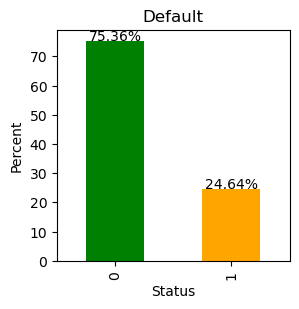

In [405]:
def draw_target_percents(data):
    percent_class = (data['Status'].value_counts() / data.shape[0] * 100)
    colors = ['green', 'orange']
    percent_class.plot(kind='bar', label='Churn', ylabel='Percent', color=colors, figsize=(3,3))
    plt.title('Default')
    for index in percent_class.keys():
        plt.text(index, percent_class[index], '{:.2f}%'.format(percent_class[index]),ha='center')
draw_target_percents(data)

Доли объектов положительного и отрицательного класса существенно различаются, классы не сбалансированы. Выплаченных кредитов - 75%, а не выплаченных - 25%.

## 1.2 Распределение пропусков по признакам.

В датасете достаточно много пропущенных данных. Рассмотрим процент пропущенных данных для каждого признака. 

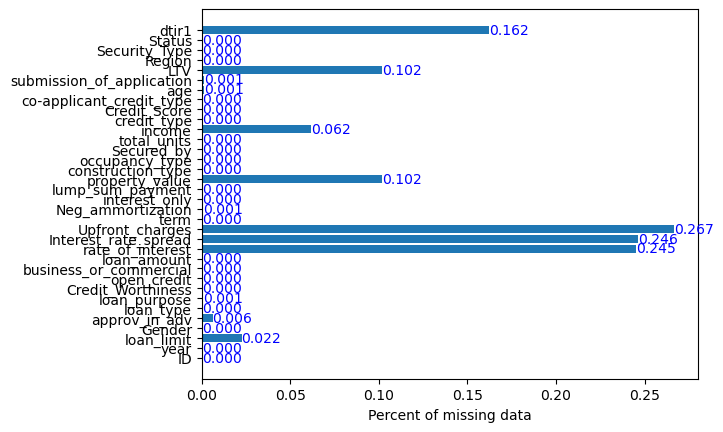

In [406]:
def draw_percent_of_missed_data(data): 
    column_names = data.columns.to_list()
    amt_data = data.shape[0]
    skipDataByFeatures = {}
    for feature in column_names:
        prcnt_skip_data = data[feature].isnull().sum() / amt_data
        skipDataByFeatures[feature] = prcnt_skip_data
        

    categories, values = list(skipDataByFeatures.keys()), list(skipDataByFeatures.values())
    fig, ax = plt.subplots()
    bars = ax.barh(categories, values)
    ax.set_xlabel('Percent of missing data')
    ax.bar_label(bars, label_type='edge', color='blue', labels= [f"{p:.3f}"  for p in values ])
    plt.show()

draw_percent_of_missed_data(data)

Больше всего пропусков у признаков dtir1, LTV, propertry_value, Upfront_charges, Interes_rate_spread, rate_of_interest.

# 2. Data preprocessing. Filling in the blanks

## Category features

In [467]:
data_processed = data

In [468]:
data_processed.Security_Type.value_counts()

Security_Type
direct      148637
Indriect        33
Name: count, dtype: int64

'Security_Type' за очень редким исключением direct. Поэтому этот признак неинформативен, удаляем его. 

In [469]:
data_processed = data_processed.drop(['Security_Type'], axis= 1)

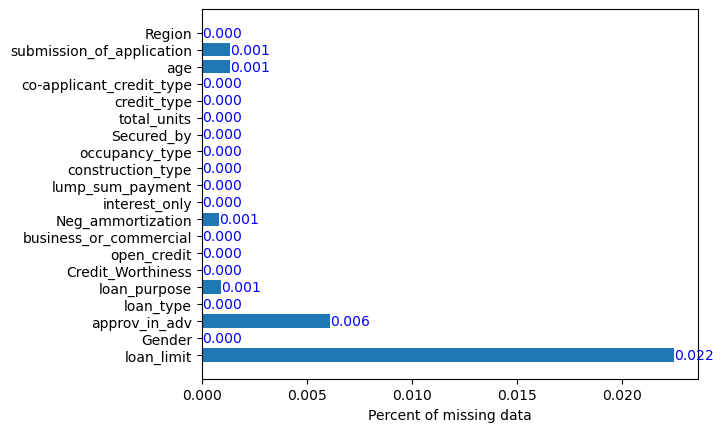

In [470]:
categorical_features = data_processed.select_dtypes(include=['object']).columns.tolist()
draw_percent_of_missed_data(data_processed[categorical_features])

Пропусков в категориальных данных мало (менее 2%), поэтому просто удалим строки с пропусками.

In [471]:
data_processed = data_processed.dropna(subset=categorical_features, how='any')

## Numeric features

In [472]:
data_processed.year.unique()

array([2019])

в данных признак year имеет только одно значение - 2019. Значит этот признак неинформативен, уберём его из датасета. Так же уберём ID

In [473]:
data_processed = data_processed.drop(['year', 'ID'], axis=1)

In [474]:
numeric_features = data_processed.select_dtypes(include=[np.number]).columns.tolist()
numeric_features

['loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'LTV',
 'Status',
 'dtir1']

Рассмотрим сколько пропущенно данных для каждого признака

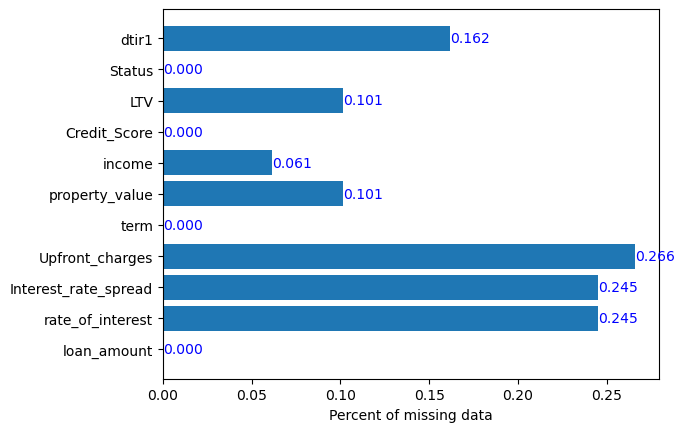

In [475]:
draw_percent_of_missed_data(data_processed[numeric_features])

Больше всего пропусков у признаков dtir1, LTV, propertry_value, Upfront_charges, Interes_rate_spread, rate_of_interest.Рассмотрим как эти пропуски распределены относительно целевой переменной.

In [476]:
def draw_percent_missed_by_target(data, max_skip_features):
    amt_default = data[data['Status'] == 1].shape[0]
    amt_payed = data[data['Status'] == 1].shape[0]
    skipDataByFeatures = {}
    for feature in max_skip_features:
        prcnt_skip_data = data[data['Status'] == 0][feature].isnull().sum() / amt_payed
        skipDataByFeatures[feature] = [prcnt_skip_data]
        
        prcnt_skip_data = data[data['Status'] == 1][feature].isnull().sum() / amt_default
        skipDataByFeatures[feature].append(prcnt_skip_data)
    missedData = pd.DataFrame(skipDataByFeatures.values(), skipDataByFeatures.keys(), columns=['Payed', 'Default'])
    ax = missedData.plot(kind='bar', figsize=(7,4))

    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3)
    plt.title('Percent of missed data by target')
    plt.show()

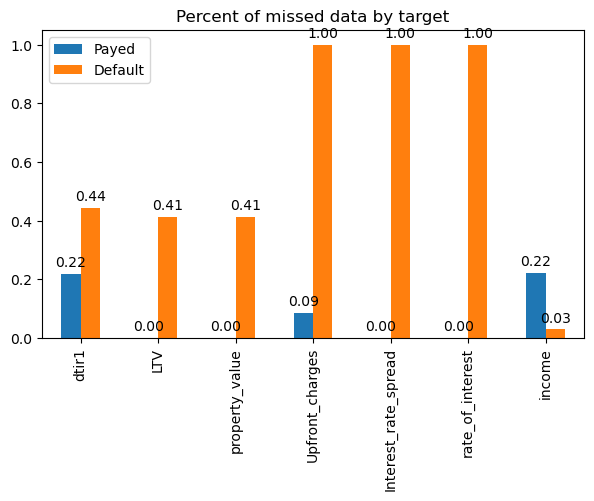

In [477]:
draw_percent_missed_by_target(data_processed[numeric_features], ['dtir1', 'LTV', 'property_value', 'Upfront_charges', 'Interest_rate_spread', 'rate_of_interest', 'income'])

Выводы:

- Для не выполоченных кредитов (Default) полностью отсутствует информация о признаках rate_of_interest, interest_rate_spread, Upfront_charges, при этом в данных по этим признаков для выплаченных кредитов нет пропусков.
- Для не выполоченных кредитов (Default) информация о признаках LTV, dtir1 отсутсвует примерно для 40% данных.
- Для выполоченных кредитов частично отсутствует информация о признаках LTV, dtir1 и income
- У признака income (доход) иногда встречаются значения равные 0, возможно это ошибка в данных.

Рассмотрим корелляции между числовыми признаками

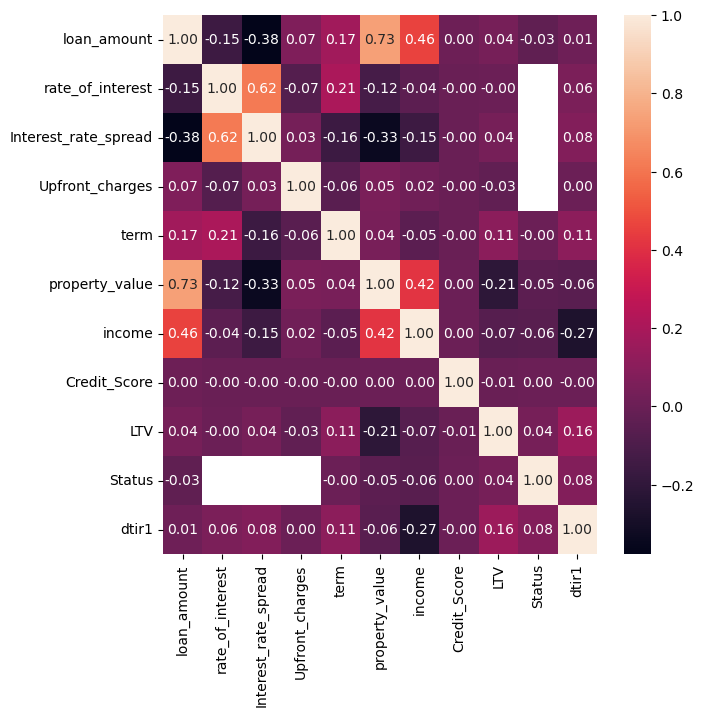

In [478]:
plt.figure(figsize = (7,7))
sns.heatmap(data_processed[numeric_features].corr(),annot=True, fmt='.2f')
plt.show()

Выводы:
- Существует сильная корреляция между размером кредита (loan_amount) и ценой недвижимости (property_value). Это логично, потому что размер заёма обычно почти равен стоимости недвижимости для покупки которой он оформляется
- Также сильно взаимосвязаны rate_of_interes и Interest_rate_spread, это связано с тем как вычисляется  Interest_rate_spread

## Restore missing data

В силу того, что информация о признаках rate_of_interest, interest_rate_spread, Upfront_charges для не выплаченных кредитов отсутствует полностью попробуем слудеющий подход:
- 1) Предположить что у людей одного возраста примерно одинаковая кредитная нагрузка и зарплата, и восстановить dtir1 и income средним  
- 2) Предположить, что у зданий с одинаковыми параметрами примерно одинаковые стоимости и востановить property_value, а потом уже и LTV
- 3) Попробовать восстановить пропуски в interestRate с помощью KNN или восстановить медианой. **Для всех восстановленных данных добавить бинарную метку о том, что они были восстановлены**. Потому что отсуствие информации тоже информация.
- 4) Удалить колонки upfront_charges (слабое скоррелированна с целевой переменной),Interest_rate_spread (полностью пустая + сильно скорелирована с interest_rate)

In [479]:
def add_missing_indicator(df, column_name):
    """
    Добавляет индикаторную переменную для пропущенных значений
    0 - значение присутствует, 1 - значение пропущено
    """
    indicator_name = f'{column_name}_missing'
    df[indicator_name] = df[column_name].isna().astype(int)
    return df

# Использование

Вспомним, что среди признака Income встречаются 0 значения и посмотрим как эти пропуски распределены относительно целевой переменной.

In [480]:
print('Default', data_processed[(data_processed['income'] == 0) & (data_processed['Status'] == 1)]['income'].value_counts())
print('Payed',data_processed[(data_processed['income'] == 0) & (data_processed['Status'] == 0)]['income'].value_counts())

Default income
0.0    1225
Name: count, dtype: int64
Payed income
0.0    8
Name: count, dtype: int64


Абсолютное большенство 0 у объектов с невыплаченным заёмом. Учитывая, что для не выплаченных кредитов было много пропусков, будем считать 0 значения пропущенными. 

In [481]:
data_processed['income'] = data_processed['income'].replace(0.0, np.nan)

Добавим индикаторы для восстановленных значений.

In [482]:
missed_features = ['dtir1', 'income', 'property_value', 'LTV', 'rate_of_interest']
for feature in missed_features:
    data_processed = add_missing_indicator(data_processed, feature)

### rate_of_interest

In [483]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
import pandas as pd
import numpy as np

def comprehensive_interest_rate_imputation(df):
    """
    Комплексная импутация только для rate_of_interest
    с использованием связанных признаков
    """
    
    df_processed = df.copy()
    
    # Шаг 1: Признаки для предсказания процентной ставки
    interest_rate_features = [
        'loan_amount', 'property_value', 'income', 'Credit_Score', 'term',
        'dtir1', 'LTV', 'Region', 'loan_type', 'occupancy_type'
    ]
    
    # Оставляем только существующие признаки
    existing_features = [f for f in interest_rate_features if f in df.columns]
    
    # Добавляем целевой признак
    target_features = existing_features + ['rate_of_interest']
    
    # Подготовка данных
    imputation_data = df_processed[target_features].copy()
    
    # One-hot encoding для категориальных переменных
    categorical_cols = [f for f in ['Region', 'loan_type', 'occupancy_type'] if f in imputation_data.columns]
    numeric_cols = [f for f in existing_features if f not in categorical_cols]
    
    if categorical_cols:
        dummies = pd.get_dummies(imputation_data[categorical_cols], drop_first=True, dummy_na=True)
        imputation_data = pd.concat([imputation_data[numeric_cols + ['rate_of_interest']], dummies], axis=1)
    
    # Масштабирование
    scaler = StandardScaler()
    imputation_scaled = scaler.fit_transform(imputation_data)
    
    # Вариант 1: Итеративная импутация (рекомендуется)
    iterative_imputer = IterativeImputer(
        max_iter=15, 
        random_state=42,
        estimator=BayesianRidge()  # Можно заменить на RandomForestRegressor(n_estimators=100)
    )
    
    imputed_scaled = iterative_imputer.fit_transform(imputation_scaled)
    
    # Обратное масштабирование
    imputed_data = scaler.inverse_transform(imputed_scaled)
    
    # Обновляем только rate_of_interest
    interest_rate_idx = len(numeric_cols)  # rate_of_interest всегда последний
    
    df_processed['rate_of_interest'] = imputed_data[:, interest_rate_idx]
    
    
    # Статистика до и после
    original_missing = df['rate_of_interest'].isna().sum()
    original_stats = df['rate_of_interest'].describe()
    imputed_stats = df_processed['rate_of_interest'].describe()
    
    print("✅ ИМПУТАЦИЯ rate_of_interest ЗАВЕРШЕНА:")
    print(f"   Заполнено пропусков: {original_missing}")
    print(f"   Использовано признаков: {len(existing_features)}")
    print(f"   Диапазон до импутации: {original_stats['min']:.2f}% - {original_stats['max']:.2f}%")
    print(f"   Диапазон после импутации: {imputed_stats['min']:.2f}% - {imputed_stats['max']:.2f}%")
    print(f"   Среднее значение: {imputed_stats['mean']:.2f}%")

    
    return df_processed

In [484]:
data_processed = comprehensive_interest_rate_imputation(data_processed)

✅ ИМПУТАЦИЯ rate_of_interest ЗАВЕРШЕНА:
   Заполнено пропусков: 35270
   Использовано признаков: 10
   Диапазон до импутации: 0.00% - 8.00%
   Диапазон после импутации: 0.00% - 8.00%
   Среднее значение: 4.04%


### dtir1 and income restoring

In [485]:
meanDtir1ByAge = data_processed.groupby(['age'])['dtir1'].mean().to_dict()
data_processed['dtir1'] = data_processed['dtir1'].fillna(data['age'].map(meanDtir1ByAge))
print(data_processed['dtir1'].isnull().sum())

0


Для зарплат (income) иногда встречается значение 0. Очевидно это опечатка или ошибка. 

In [486]:
data_processed['income'] = data_processed['income'].replace(0.0, np.nan)

In [487]:
meanIncomeByAge = data_processed.groupby(['age'])['income'].mean().to_dict()
data_processed['income'] = data_processed['income'].fillna(data['age'].map(meanDtir1ByAge))
print(data_processed['income'].isnull().sum())

0


### LTV and Property_value restoring

In [488]:
similar_building_price = data_processed.groupby(['construction_type', 'occupancy_type', 'total_units', 'Region'])['property_value'].transform('median')
data_processed['property_value'] = data_processed['property_value'].fillna(similar_building_price)

In [489]:
data_processed['LTV'] = data_processed['LTV'].fillna((data_processed['loan_amount'] / data_processed['property_value']) * 100)

### Delete columns with a lot of missed data

In [490]:
data_processed = data_processed.drop(['Interest_rate_spread', 'Upfront_charges'], axis=1)

### term to categorical feature 

Превратим переменную term в категориальную, по следующим причинам: 
- Мало уникальных значений (скорее всего 180, 240, 300, 360 дней и т.д.)

- Не линейная зависимость с дефолтом (риск может не расти линейно со сроком)

- Категориальная природа - это дискретные "продуктовые" категории, а не непрерывная величина

In [491]:
# Или с явным указанием границ
data_processed['term'] = pd.cut(data_processed['term'],
                            bins=[0, 120, 250, 500],
                            labels=['short', 'medium', 'long'])

## Filtering data

### Numeric features

In [503]:
data_clean = data_processed
numeric_features = ['loan_amount','rate_of_interest','property_value','income','Credit_Score','LTV','dtir1']

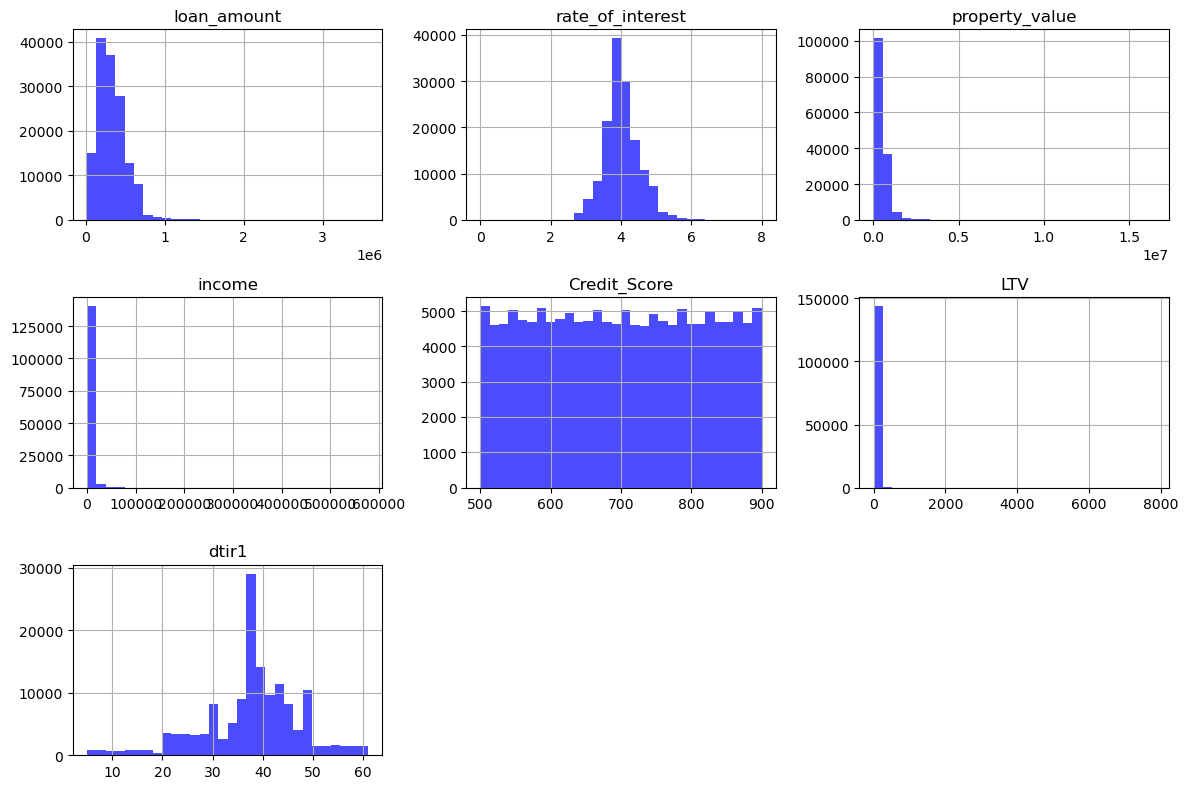

In [504]:
ax = data_clean[numeric_features].hist(figsize=(12, 8), bins=30, alpha=0.7, color='blue')
plt.tight_layout()
plt.show()

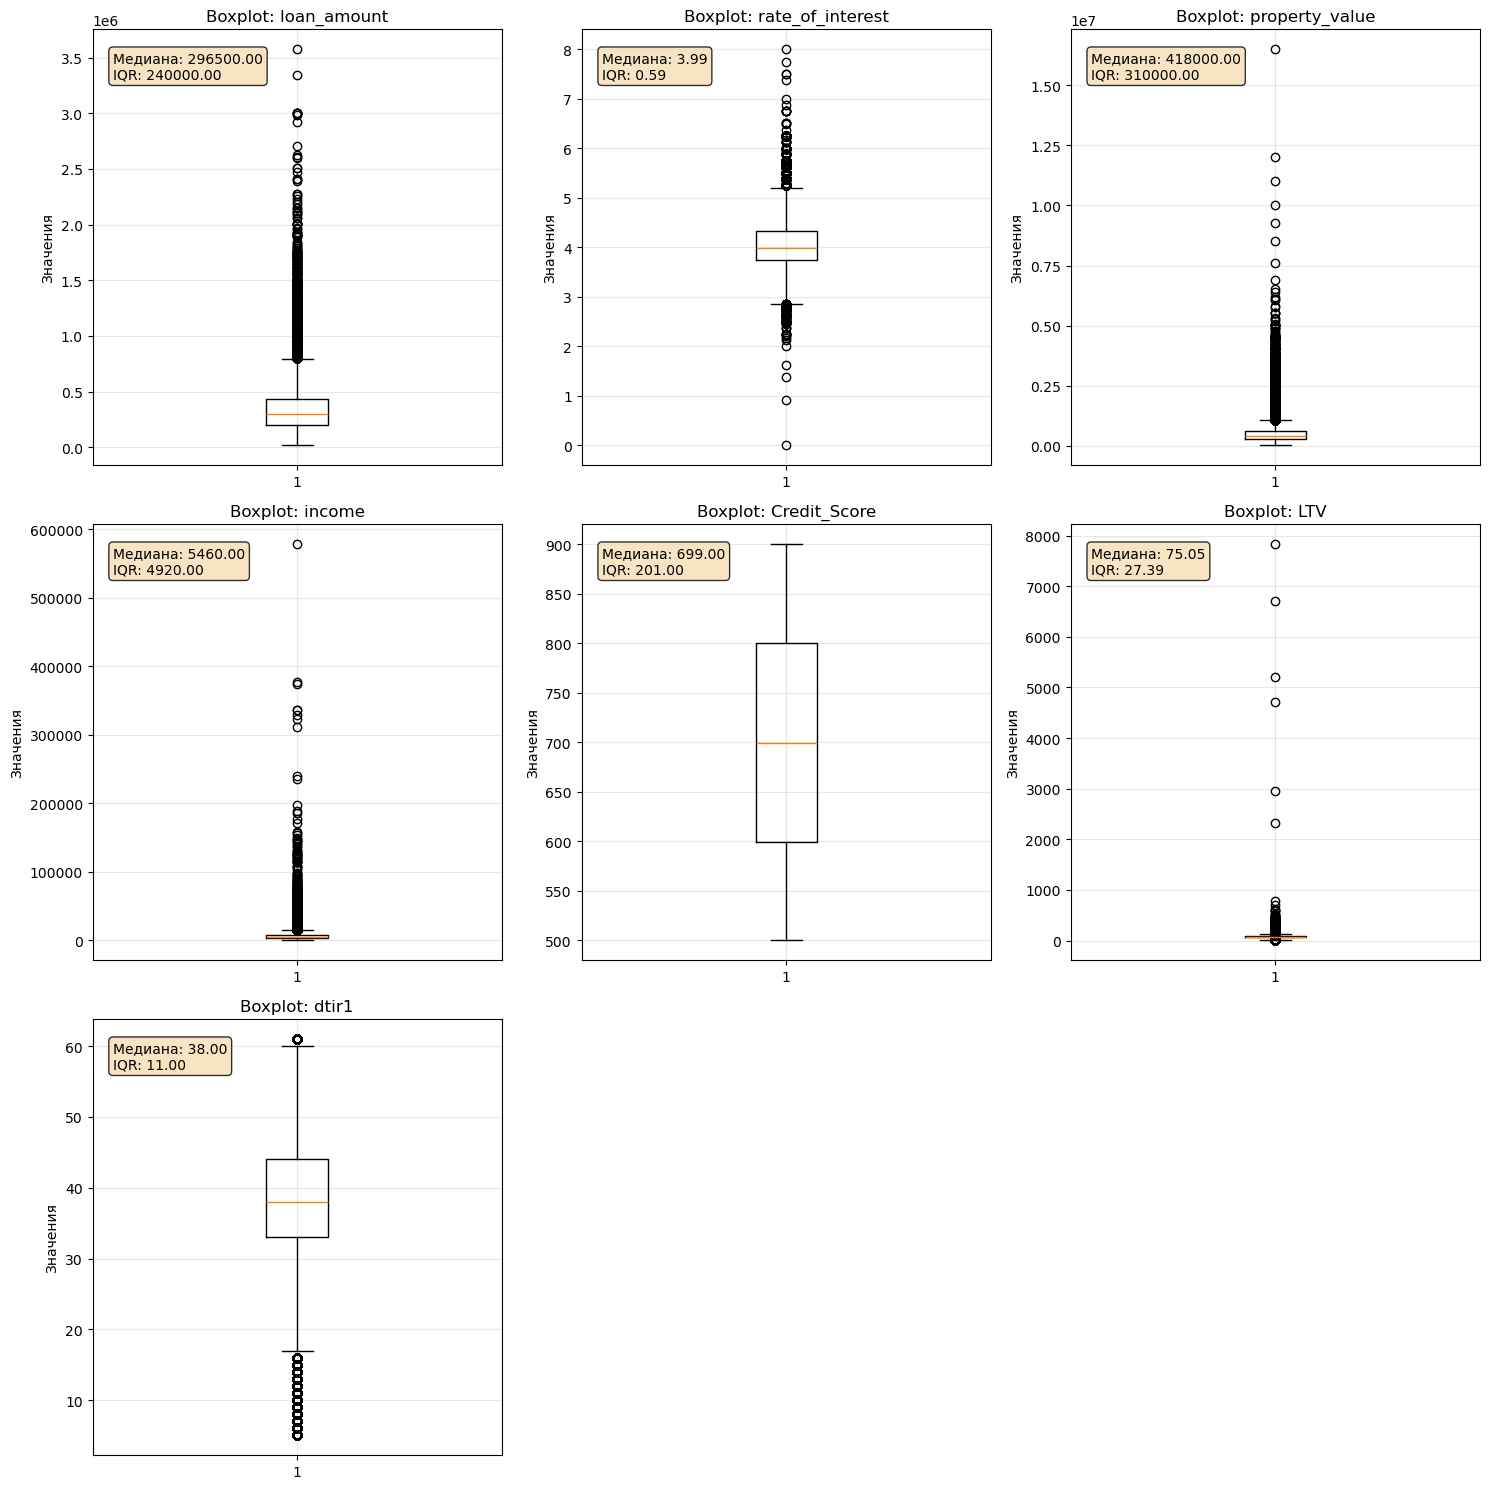

In [506]:
# Создаем сетку графиков
def draw_boxPlots(data, features):
    data = data[features]
    n_cols = 3
    n_rows = (len(features) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]

    for i, col in enumerate(features):
        # Вертикальный boxplot
        axes[i].boxplot(data[col].dropna(), vert=True)
        axes[i].set_title(f'Boxplot: {col}')
        axes[i].set_ylabel('Значения')
        axes[i].grid(True, alpha=0.3)
        
        # Добавляем основные статистики
        stats = data[col].describe()
        axes[i].text(0.05, 0.95, f'Медиана: {stats["50%"]:.2f}\n'
                                f'IQR: {stats["75%"]-stats["25%"]:.2f}', 
                    transform=axes[i].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    # Скрываем пустые subplots
    for i in range(len(features), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
draw_boxPlots(data_processed, numeric_features)

По графикам заметно, что у признаков LTV, property_value, income есть большие выбросы. Посмотрим на boxplot

Отфильтруем выбросы по ризнакам loan_amount, propertry_value, income, LTV.

In [514]:
check_features = ['loan_amount', 'property_value', 'income', 'LTV']
quantiles = {}
for feature in check_features:
    quantiles[feature] = (data_clean[feature].quantile(0.02),  data_clean[feature].quantile(0.98))

In [515]:
quantiles

{'loan_amount': (np.float64(76500.0), np.float64(726500.0)),
 'property_value': (np.float64(118000.0), np.float64(1408000.0)),
 'income': (np.float64(37.23488883095602), np.float64(20421.59999999916)),
 'LTV': (np.float64(23.61325116), np.float64(113.9367816091954))}

In [516]:
for feature, q in quantiles.items():
    print(feature, data_clean[(data_clean[feature] > q[0]) & (data_clean[feature] < q[1])].shape[0] /data_clean.shape[0])

loan_amount 0.9482994520186411
property_value 0.9558906259766778
income 0.950744185077405
LTV 0.9599674961627415


In [517]:
for feature, q in quantiles.items():
    data_clean = data_clean[(data_clean[feature] > q[0]) & (data_clean[feature] < q[1])]
    

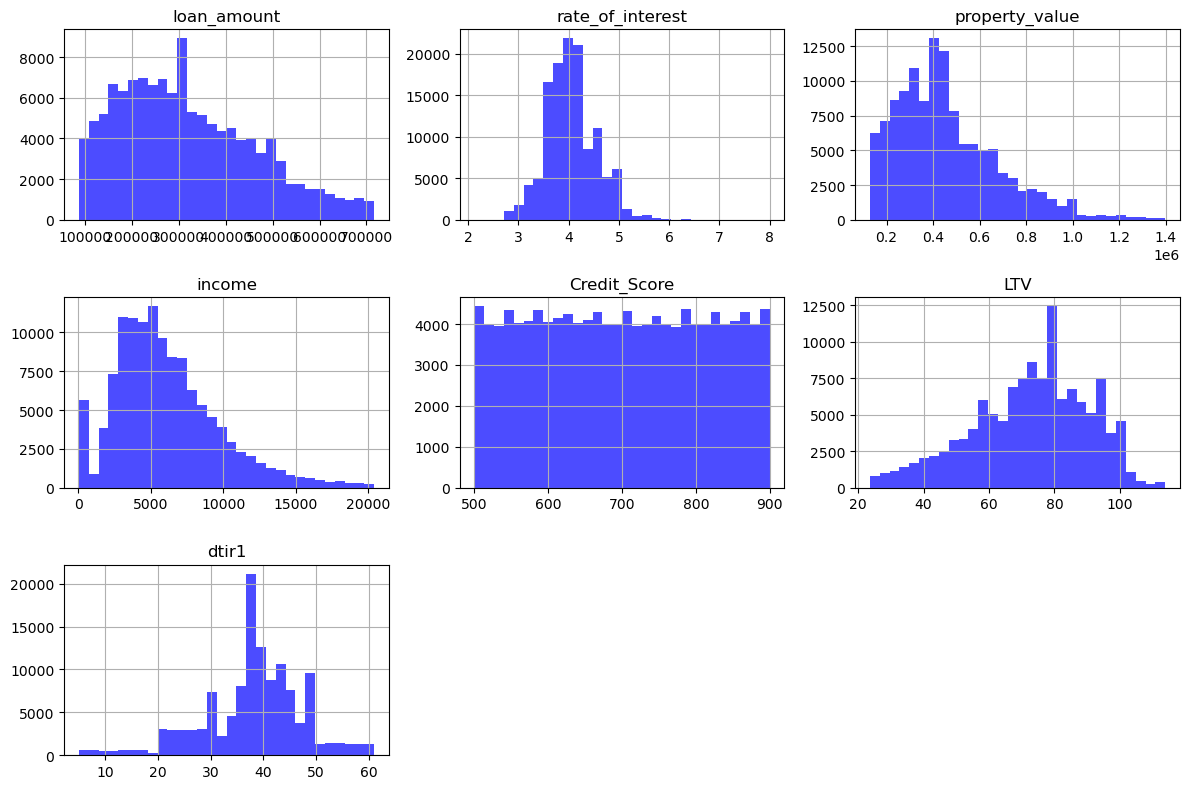

In [518]:
ax = data_clean[numeric_features].hist(figsize=(12, 8), bins=30, alpha=0.7, color='blue')
plt.tight_layout()
plt.show()

### Categorical features

Рассмотрим категориальные признаки. Может среди них есть признаки которые почти целиком состояит из одного значения

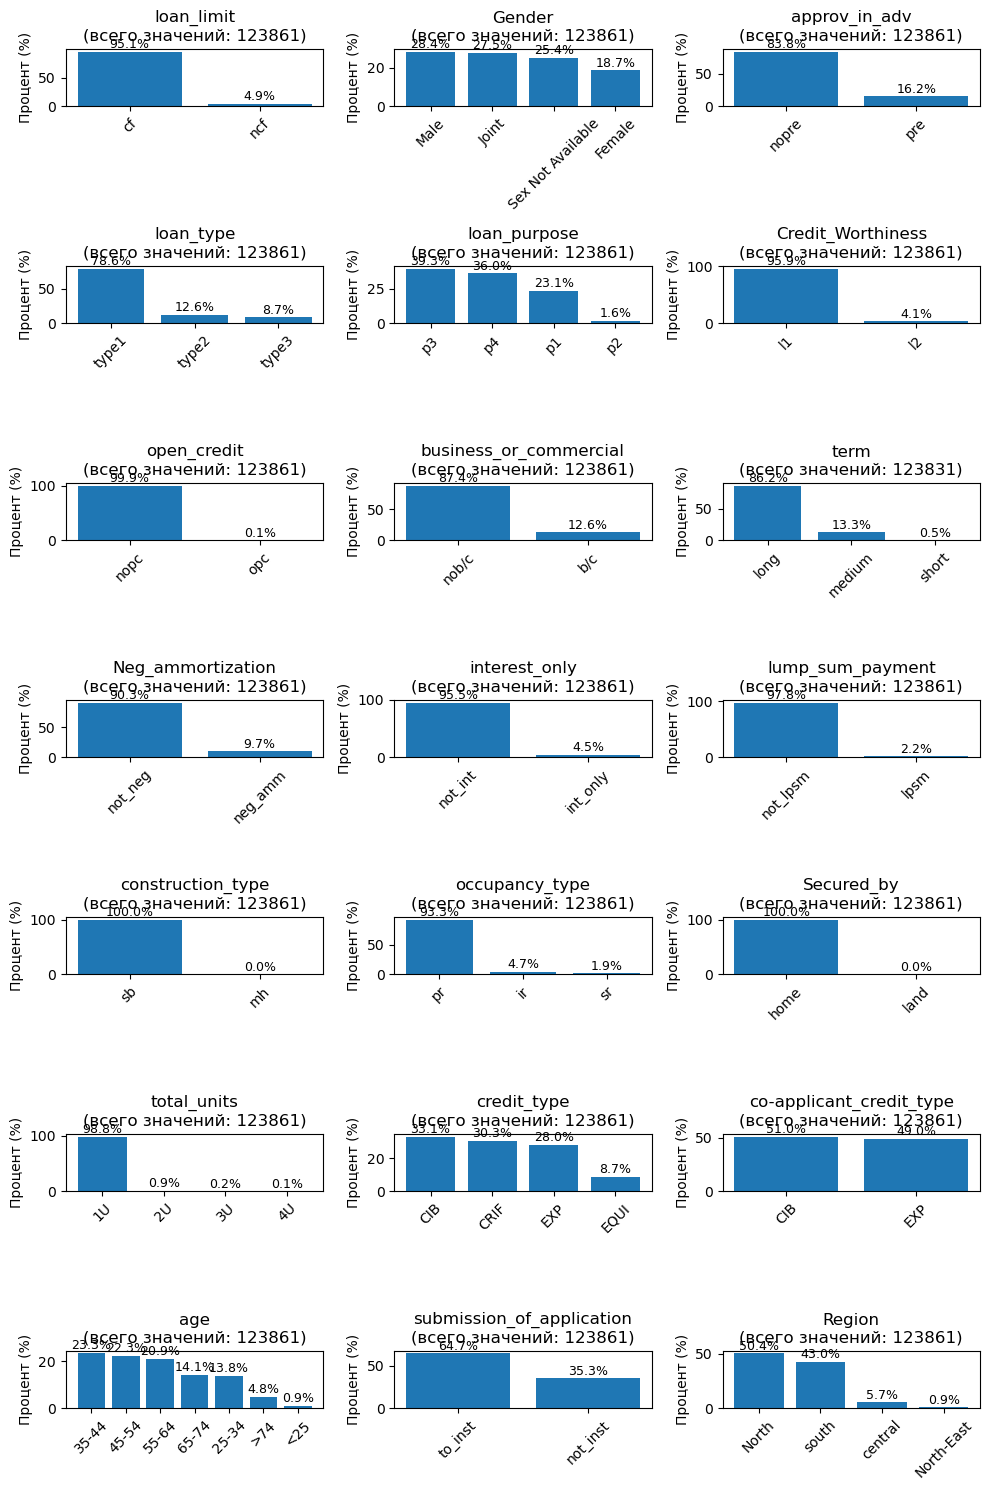

In [523]:
def plot_categorical_percentages(df, figsize=(10, 15)):
    """
    Строит гистограммы с процентным распределением для всех категориальных признаков
    """
    # Выбираем только категориальные колонки
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    
    n_cols = len(categorical_columns)
    if n_cols == 0:
        print("Нет категориальных признаков в датафрейме")
        return
    
    # Вычисляем количество строк и столбцов для subplot
    n_rows = (n_cols + 2) // 3  # максимум 3 графика в строке
    fig, axes = plt.subplots(n_rows, 3, figsize=figsize)
    axes = axes.flatten() if n_rows > 1 else [axes]  # выравниваем оси
    
    for i, col in enumerate(categorical_columns):
        if i < len(axes):
            # Считаем проценты
            value_counts = df[col].value_counts(normalize=True) * 100
            
            # Строим барплот
            bars = axes[i].bar(value_counts.index.astype(str), value_counts.values)
            axes[i].set_title(f'{col}\n(всего значений: {len(df[col].dropna())})')
            axes[i].set_ylabel('Процент (%)')
            axes[i].tick_params(axis='x', rotation=45)
            
            # Добавляем подписи значений на столбцы
            for bar, value in zip(bars, value_counts.values):
                height = bar.get_height()
                axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                           f'{value:.1f}%', ha='center', va='bottom', fontsize=9)
            
            # Ограничиваем количество отображаемых категорий для читаемости
            if len(value_counts) > 10:
                axes[i].set_title(f'{col}\n(первые 10 из {len(value_counts)} категорий)')
    
    # Скрываем пустые subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Использование
plot_categorical_percentages(data_clean)

Признаки total units, construction_type, occupance type целиком состоят из одного значения, к тому же они мало информативны удалим их из датасета.

In [ ]:
data_clean.occupancy_type

In [528]:
data_clean = data_clean.drop(['total_units','construction_type', 'occupancy_type'], axis=1)

### Save data

Сохраним полученные данные

In [693]:
data_clean.to_csv('Data/privilege_clean_data.csv', index=False)

Также сохраним данные без информации о пропусках. Модели могут переобучаться из-за наличия этой привилигированной информации.

In [694]:
column_names = data_clean.columns.to_list()
missing_indicators = [col for col in column_names if col.endswith('missing')]
missing_indicators

['dtir1_missing',
 'income_missing',
 'property_value_missing',
 'LTV_missing',
 'rate_of_interest_missing']

In [695]:
data_clean = data_clean.drop(missing_indicators, axis=1)

In [696]:
data_clean.to_csv('Data/clean_data_no_extra_info.csv', index=False)

# 3. EDA

In [530]:
data_clean = pd.read_csv('Data\clean_data.csv')

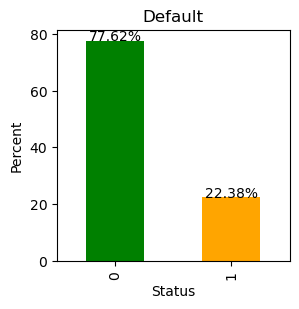

In [531]:
draw_target_percents(data_clean)

Присутсвует сильный дисбаланс классов

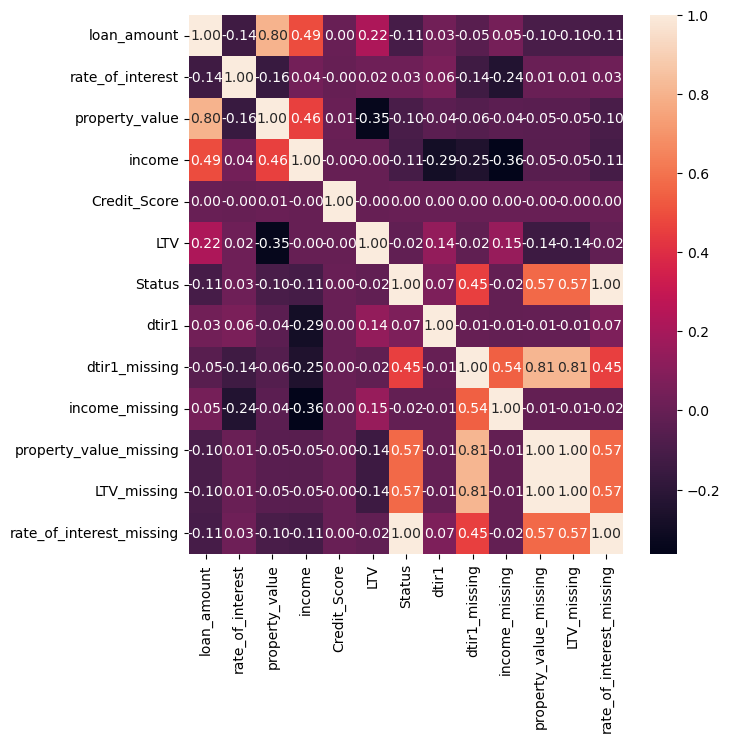

In [539]:
continuos_numeric_features = data_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize = (7,7))
sns.heatmap(data_clean[continuos_numeric_features].corr(),annot=True, fmt='.2f')
plt.show()

**Выводы:**
 - Существует корреляция между размером кредита (loan_amount) и ценой недвижимости (property_value). Это логично, потому что размер заёма зависит от стоимости недвижимости для покупки которой он оформляется
 - Так же взаимосвязаны доход (income), размер кредита (loan_amount) и стоимость недвижимости (property_value)
 - LTV коррелирует со стоимостью недвижимости (property value). Это объясняется тем, как вычисляется LTV. 
 - Знание о пропущенных данных сильно влияет на целевую переменную


## 2.1 Hypotheses

- 1. Заёмщики с высоким кредитным рейтингом чаще возвращают кредиты
- 2. Крупные кредиты возвращают чаще
- 3. Люди которые выплатили кредит зарабатывают больше внезависимости от пола
- 4. Гендер заёмщика не влияет на выплату  кредита
- 5. Кредиты с большим сроком чаще возвращают
- 6. Цель кредита не влияет на вероятность его возврата
- 7. Коммерческие кредиты возвращают чаще
- 8. Кредиты которые требуют единовременной оплаты по истичению срока, возвращают реже
- 9. Предодобренные кредиты чаще возвращают
- 10. Кредиты соответствующии лимита чаще возвращают
- 11. Заёмщики с высокой кредитоспособностью чаще возвращают кредиты
- 12. Взрослые люди чаще возвращают кредиты, чем более молодые
- 13. Заёмщики с низким dtir1 (меньшей кредитной нагрузкой) чаще возвращают долг
- 14. Region не влияет на дефолт.
- 15. Тип кредита влияет на то вернуть его или нет

### Гипотеза 1. Заёмщики с высоким кредитным рейтингом чаще возвращают кредиты

In [533]:
def plot_feature_by_target(df, feature, target='Status'):
    """Универсальная функция для визуализации признака по бинарной цели"""
    
    fig, axes = plt.subplots(1, 2, figsize=(8,5))
    
    
    
    # 3. Boxplot
    sns.boxplot(data=df, x=target, y=feature, ax=axes[0],palette=['lightblue', 'salmon'])
    axes[0].set_title(f'Boxplot {feature} по {target}')
    
    # 4. Violin plot
    sns.violinplot(data=df, x=target, y=feature, ax=axes[1])
    axes[1].set_title(f'Violin plot {feature} по {target}')
    
    plt.tight_layout()
    plt.show()
    
    # Статистика
    print(f"\nСтатистика {feature} по {target}:")
    print(df.groupby(target)[feature].describe())

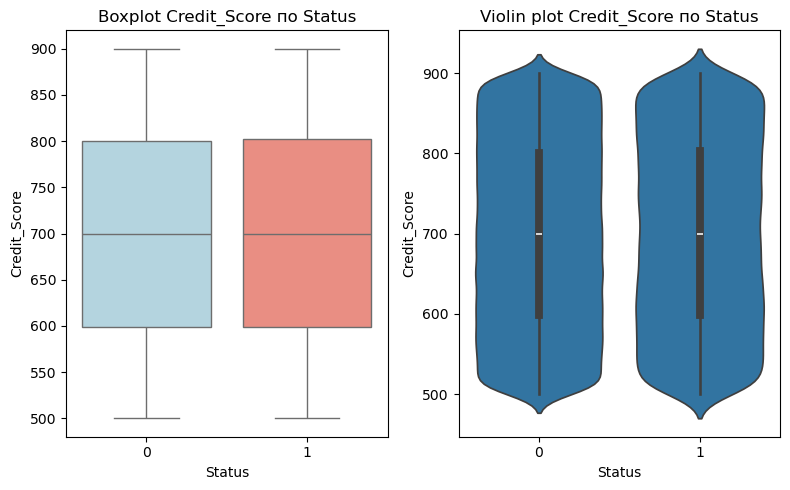


Статистика Credit_Score по Status:
          count        mean         std    min    25%    50%     75%    max
Status                                                                     
0       96147.0  699.530771  115.699587  500.0  599.0  699.0  800.00  900.0
1       27714.0  700.180198  116.676104  500.0  599.0  700.0  802.75  900.0


In [534]:
plot_feature_by_target(data_clean, 'Credit_Score', 'Status')

Гипотеза не оправдалась.Распределения почти полностью совпали.

### Гипотеза 2. Крупные кредиты возвращают чаще. 

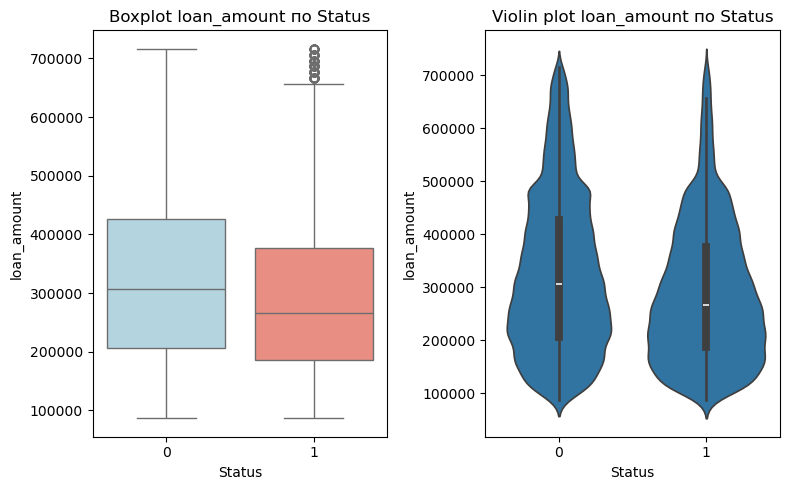


Статистика loan_amount по Status:
          count           mean            std      min       25%       50%  \
Status                                                                       
0       96147.0  327327.586924  148002.974926  86500.0  206500.0  306500.0   
1       27714.0  289625.496139  130859.206702  86500.0  186500.0  266500.0   

             75%       max  
Status                      
0       426500.0  716500.0  
1       376500.0  716500.0  


In [535]:
plot_feature_by_target(data_clean, 'loan_amount', 'Status')

Гипотеза отчасти подтвердилась. График у выплаченных кредитов находится чуть выше. Так же не стоит забывать, что это графики уже для логорифмированной величины, а значит для исходных величин разница еще заметнее.

### Гипотеза 3. Люди которые выплатили кредит зарабатывают больше внезависимости от пола

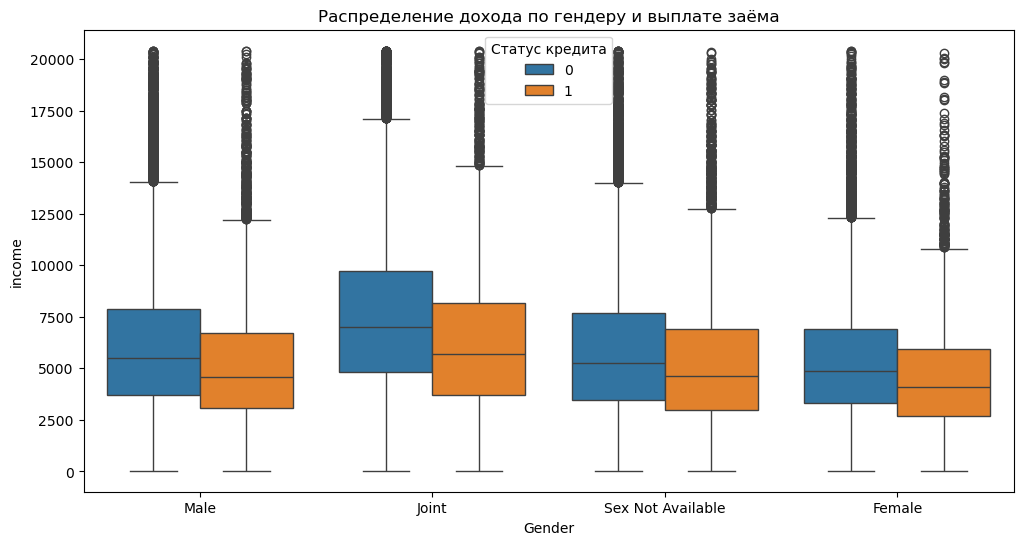

In [536]:
# Пример: распределение дохода по региону, с разбивкой по статусу кредита
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_clean, x='Gender', y='income', hue='Status')
plt.title('Распределение дохода по гендеру и выплате заёма')
plt.legend(title='Статус кредита')
plt.show()

Действительно заёмщики выплатившие кредит имеют более высокие зарплаты.

### Гипотеза 4. Гендер заёмщика не влияет на выплату  кредита

<Figure size 1000x600 with 0 Axes>

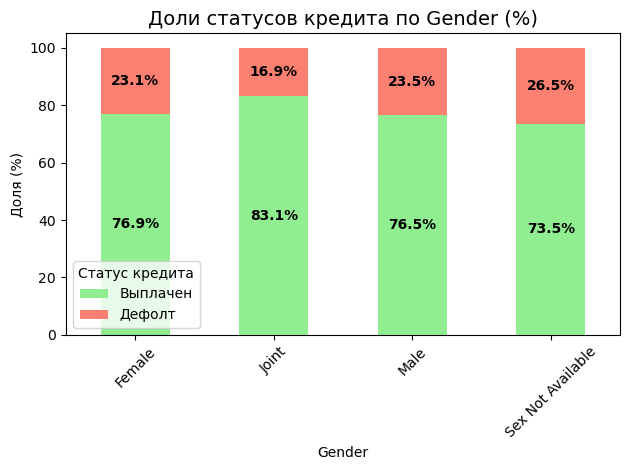

Таблица долей по Gender (%):
                   Выплачен  Дефолт
Gender                             
Female                 76.9    23.1
Joint                  83.1    16.9
Male                   76.5    23.5
Sex Not Available      73.5    26.5



In [537]:
def plot_category_percentages(df, category_col, target_col='Status'):
    # Считаем доли
    category_pct = df.groupby(category_col)[target_col].value_counts(normalize=True).unstack() * 100
    category_pct.columns = ['Выплачен', 'Дефолт']
    
    # Визуализация
    plt.figure(figsize=(10, 6))
    ax = category_pct.plot(kind='bar', stacked=True, 
                          color=['lightgreen', 'salmon'])
    
    plt.title(f'Доли статусов кредита по {category_col} (%)', fontsize=14)
    plt.xlabel(category_col)
    plt.ylabel('Доля (%)')
    plt.legend(title='Статус кредита')
    plt.xticks(rotation=45)
    
    # Добавляем проценты на каждый сегмент
    for i, (category, row) in enumerate(category_pct.iterrows()):
        cumulative = 0
        for status, pct in row.items():
            if pct > 0:  # только если доля > 0%
                ax.text(i, cumulative + pct/2, f'{pct:.1f}%', 
                       ha='center', va='center', fontweight='bold', fontsize=10)
            cumulative += pct
    
    plt.tight_layout()
    plt.show()
    
    print(f"Таблица долей по {category_col} (%):")
    print(category_pct.round(1))
    print("\n" + "="*50)
    
    return category_pct

# Использование
gender_summary = plot_category_percentages(data_clean, 'Gender')

Действительно гендер не имеет значения, а значит этот признак можно будет убрать из рассмотрения.

### Гипотеза 5. Кредиты с большим сроком чаще возвращают

<Figure size 1000x600 with 0 Axes>

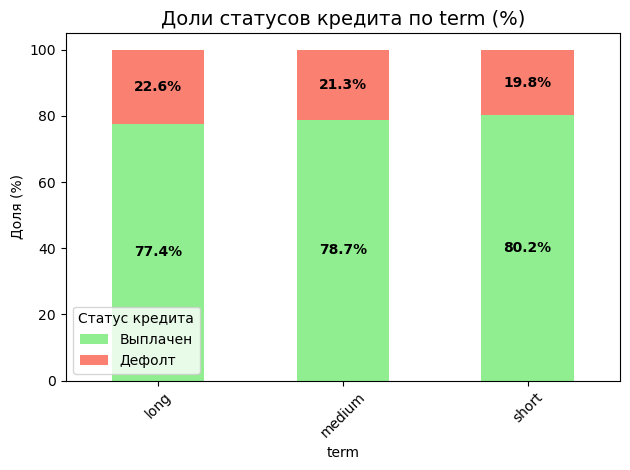

Таблица долей по term (%):
        Выплачен  Дефолт
term                    
long        77.4    22.6
medium      78.7    21.3
short       80.2    19.8



In [594]:
term_summary = plot_category_percentages(data_clean, 'term')

Гипотеза не подтвердилась. Оказалось что чаще возвращают заёмы с самым коротким сроком.

### Гипотеза 6. Цель кредита не влияет на вероятность его возврата

<Figure size 1000x600 with 0 Axes>

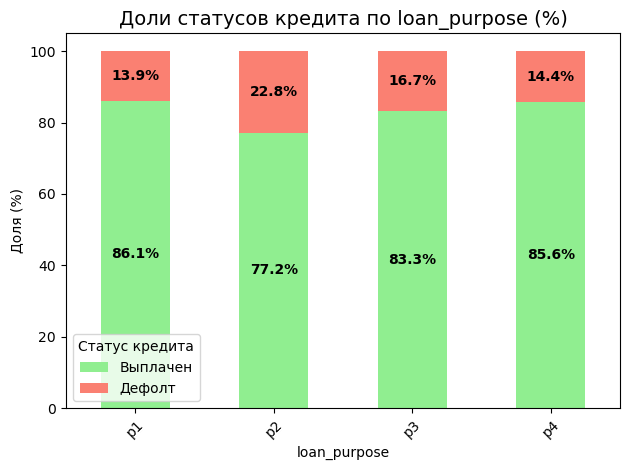

Таблица долей по loan_purpose (%):
              Выплачен  Дефолт
loan_purpose                  
p1                86.1    13.9
p2                77.2    22.8
p3                83.3    16.7
p4                85.6    14.4



In [ ]:
purpose_summary = plot_category_percentages(data_clean, 'loan_purpose')

Это действительно так. Разница незначительна. Выделяется только p2. 

<Figure size 1000x600 with 0 Axes>

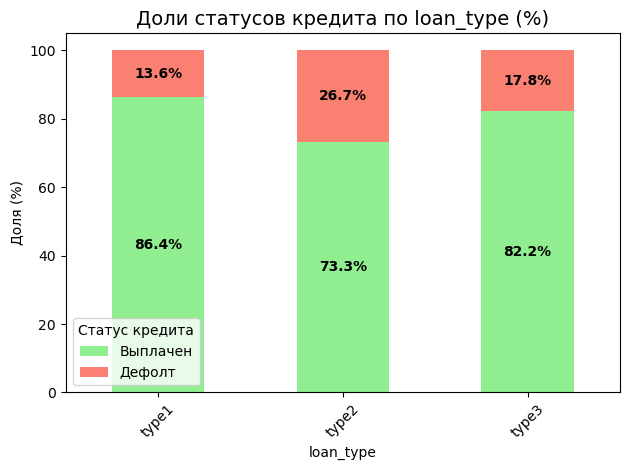

Таблица долей по loan_type (%):
           Выплачен  Дефолт
loan_type                  
type1          86.4    13.6
type2          73.3    26.7
type3          82.2    17.8



In [ ]:
type_summary = plot_category_percentages(data_clean, 'loan_type')

Кредиты 2 типа невыплачивают чаще.

### Гипотеза 7. Коммерческие кредиты возвращают чаще

<Figure size 1000x600 with 0 Axes>

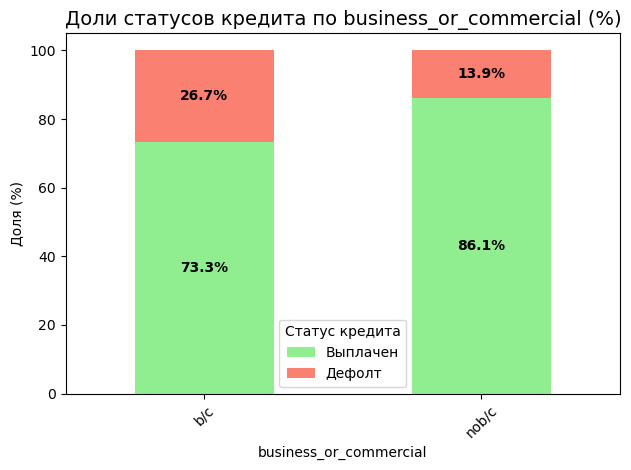

Таблица долей по business_or_commercial (%):
                        Выплачен  Дефолт
business_or_commercial                  
b/c                         73.3    26.7
nob/c                       86.1    13.9



In [ ]:
type_summary = plot_category_percentages(data_clean, 'business_or_commercial')

Гипотеза не подтвердилась. Наоборот коммерческие кредиты в 2 раза чаще не возвращают.

### Гипотеза 8. Кредиты которые требуют единовременной оплаты по истичению срока, возвращают реже


<Figure size 1000x600 with 0 Axes>

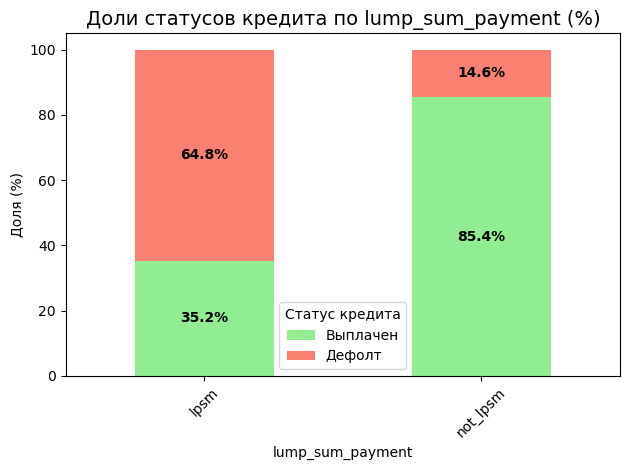

Таблица долей по lump_sum_payment (%):
                  Выплачен  Дефолт
lump_sum_payment                  
lpsm                  35.2    64.8
not_lpsm              85.4    14.6



In [ ]:
lump_sum_summary = plot_category_percentages(data_clean, 'lump_sum_payment')

Кредиты требущие единовременной выплаты не возвращают в 4 раза чаще. Гипотеза подтвердилась.

### Гипотеза 9. Предодобренные кредиты чаще возвращают


<Figure size 1000x600 with 0 Axes>

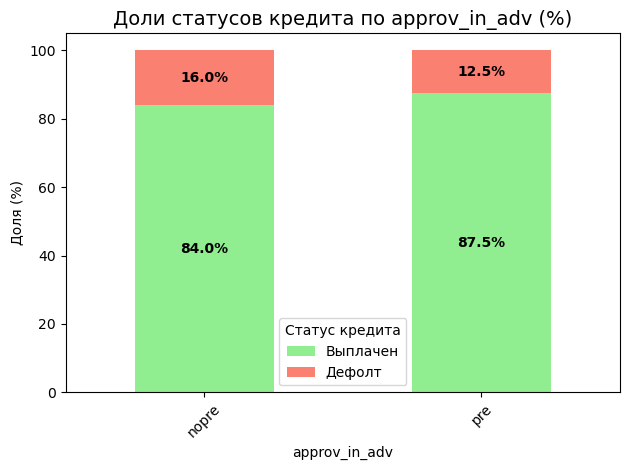

Таблица долей по approv_in_adv (%):
               Выплачен  Дефолт
approv_in_adv                  
nopre              84.0    16.0
pre                87.5    12.5



In [ ]:
aprovv_summary = plot_category_percentages(data_clean, 'approv_in_adv')

Гипотеза не подтвердилась. Доли возвращенных кредитов одинаковые.

### Гипотеза 10. Кредиты соответствующии лимита чаще возвращают


<Figure size 1000x600 with 0 Axes>

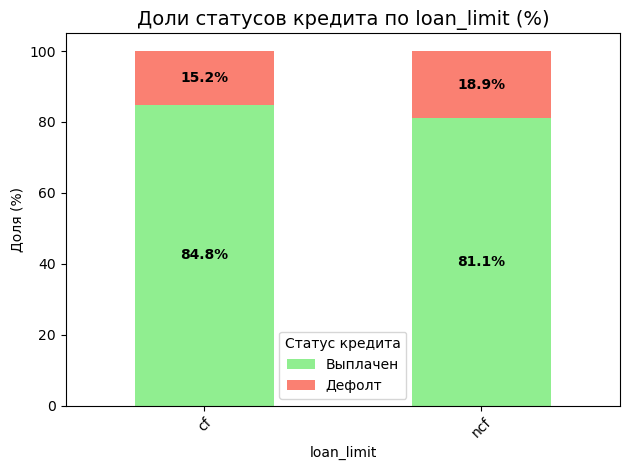

Таблица долей по loan_limit (%):
            Выплачен  Дефолт
loan_limit                  
cf              84.8    15.2
ncf             81.1    18.9



In [ ]:
loan_limit_summary = plot_category_percentages(data_clean, 'loan_limit')

Гипотеза не подтвердилась. Возможно кредиты которые выходили за лимиты выдавали на коммерческие цели в надежде на грамотное управление и оценку рисков от компании заёмщика.

<Figure size 1000x600 with 0 Axes>

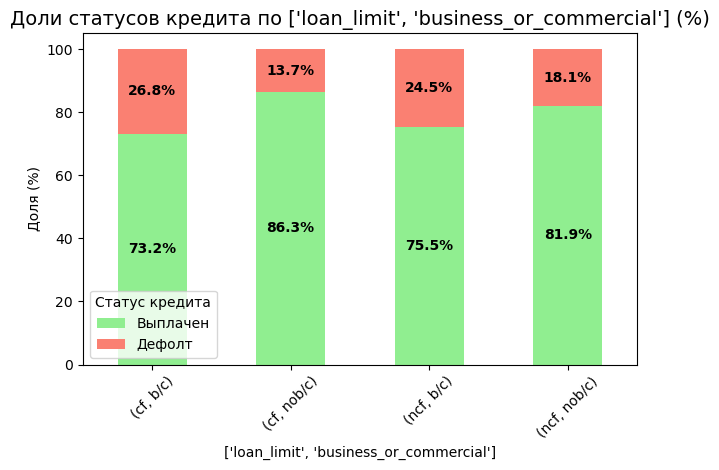

Таблица долей по ['loan_limit', 'business_or_commercial'] (%):
                                   Выплачен  Дефолт
loan_limit business_or_commercial                  
cf         b/c                         73.2    26.8
           nob/c                       86.3    13.7
ncf        b/c                         75.5    24.5
           nob/c                       81.9    18.1



In [ ]:
loan_summary= plot_category_percentages(data_clean, ['loan_limit', 'business_or_commercial'])

Теория не подтвердилась. Но выяснили что самые надежные - частные заёмщики, сумма кредитов которых ниже лимита.

### Гипотеза 11. Заёмщики с высокой кредитоспособностью чаще возвращают кредиты


<Figure size 1000x600 with 0 Axes>

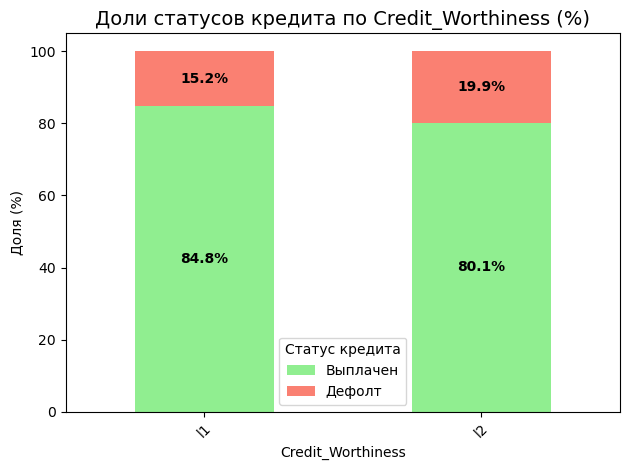

Таблица долей по Credit_Worthiness (%):
                   Выплачен  Дефолт
Credit_Worthiness                  
l1                     84.8    15.2
l2                     80.1    19.9



In [ ]:
term_summary = plot_category_percentages(data_clean, 'Credit_Worthiness')

Разница не столь значительна. 

### Гипотеза 12. Взрослые люди чаще возвращают кредиты, чем более молодые


<Figure size 1000x600 with 0 Axes>

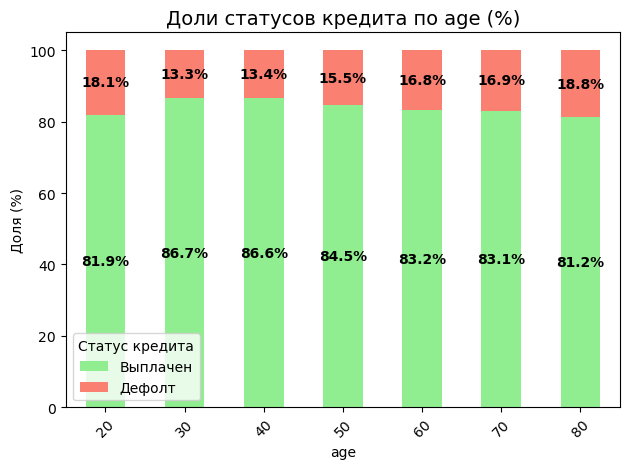

Таблица долей по age (%):
     Выплачен  Дефолт
age                  
20       81.9    18.1
30       86.7    13.3
40       86.6    13.4
50       84.5    15.5
60       83.2    16.8
70       83.1    16.9
80       81.2    18.8



In [ ]:
age_summary = plot_category_percentages(data_clean, 'age')

Гипотеза не подтвердилась. Возраст не влияет на выплаты кредита.

### Гипотеза 13. Заёмщики с низкм dtir1 (меньшей кредитной нагрузкой) чаще возвращают долг

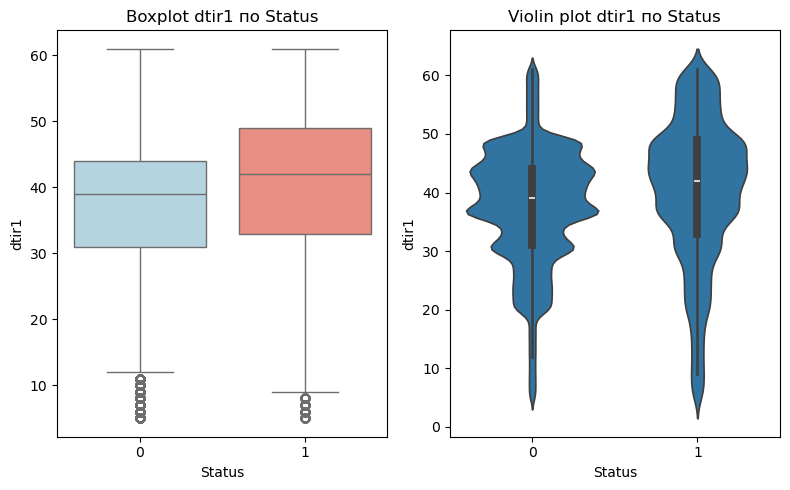


Статистика dtir1 по Status:
          count       mean        std  min   25%   50%   75%   max
Status                                                            
0       94301.0  37.607523   9.824307  5.0  31.0  39.0  44.0  61.0
1       17159.0  40.140859  12.374834  5.0  33.0  42.0  49.0  61.0


In [ ]:
plot_feature_by_target(data_clean, 'dtir1', 'Status')

Гипотеза подтвердилась. Boxplot для невыплаченных кредитов находится заметно выше. Так же violinplot для не выплаченных кредитов сильно вытянут в сторону больших значений и находится выше, а значит в нём преобладают большие значениея. 

### Гипотеза 14. Region не влияет на дефолт

<Figure size 1000x600 with 0 Axes>

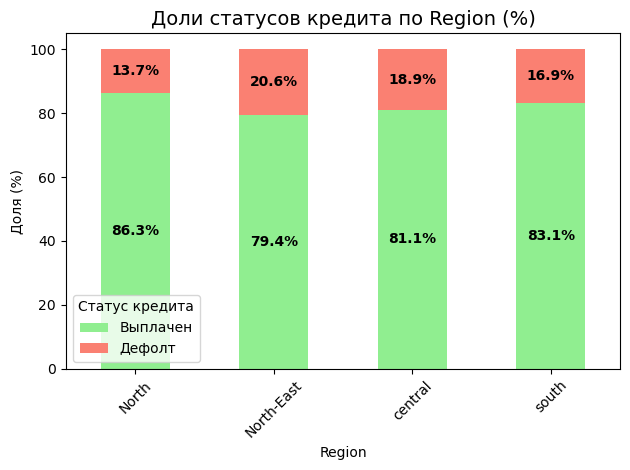

Таблица долей по Region (%):
            Выплачен  Дефолт
Region                      
North           86.3    13.7
North-East      79.4    20.6
central         81.1    18.9
south           83.1    16.9



In [ ]:
age_summary = plot_category_percentages(data_clean, 'Region')

Гипотеза подтвердилась. В дальнейшем можно будет убрать этот признак для упрощения модели.

### Гипотеза 15. Тип кредита влияет на то вернуть его или нет

<Figure size 1000x600 with 0 Axes>

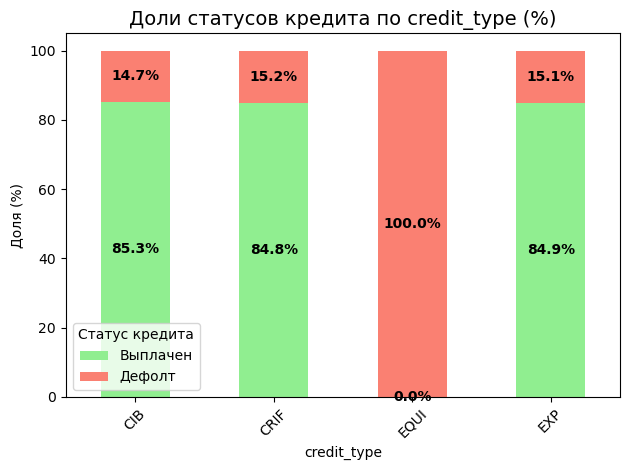

Таблица долей по credit_type (%):
             Выплачен  Дефолт
credit_type                  
CIB              85.3    14.7
CRIF             84.8    15.2
EQUI              0.0   100.0
EXP              84.9    15.1



In [615]:
creditType_summary = plot_category_percentages(data_clean, 'credit_type')

In [616]:
data_clean.credit_type.value_counts()

credit_type
CIB     40982
CRIF    37517
EXP     34622
EQUI    10740
Name: count, dtype: int64

Кредиты с типом EQUI вообще не выплачивали

# 4. ML

В силу того, что датасет содержит данные о ипотечных кредитах, для банков важно не выдавать кредиты ненадежным заёмщикам. Потому что убытки в таком случае велики. Так же важна не только метка целевой переменной, но и вероятность дефолта. Поэтим причинам будут использоваться метрики Recall и Gini

## 3.1 Baseline logistic regression
В качестве базовой модели возьмём модель линейной регрессии. 
Преимуществами данной модели являются: 
- Прозрачность модели: Легко понять, как признаки влияют на предсказание

- Вероятностный вывод: Возвращает вероятности классов, а не только метки

- Коэффициенты: Можно интерпретировать влияние каждого признака

In [2]:
data = pd.read_csv('Data\privilege_clean_data.csv')
X, Y = data.drop(['Status'], axis=1), data['Status']
X = pd.get_dummies(X, drop_first=True)

Будем использовать еще и валидационную выборку для того чтобы избежать утечки данных и использовать эту выборку для подбора гиперпараметров.

In [4]:
def split_data_stratified(X, y, test_size=0.2, random_state=42, need_validate=False, val_size=0.2):
    # Сначала отделяем test
    if need_validate:
        X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
        )
        # Затем temp делим на train/validation
        val_size_adj = val_size / (1 - test_size)  # корректируем размер
        X_train, X_val, y_train, y_val = train_test_split(
            X_temp, y_temp, test_size=val_size_adj, stratify=y_temp, random_state=random_state
        )
        print(f"Распределение классов:")
        print(f"Train:      {pd.Series(y_train).value_counts().sort_index().values}")
        print(f"Validation: {pd.Series(y_val).value_counts().sort_index().values}")
        print(f"Test:       {pd.Series(y_test).value_counts().sort_index().values}")
        return X_train, X_val, X_test, y_train, y_val, y_test
    else:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, stratify=y, random_state=random_state
        )
        print(f"Распределение классов:")
        print(f"Train:      {pd.Series(y_train).value_counts().sort_index().values}")
        print(f"Test:       {pd.Series(y_test).value_counts().sort_index().values}")
        return X_train, X_test, y_train, y_test
        
        
# Использование
X_train, X_test, y_train, y_test = split_data_stratified(X, Y)

Распределение классов:
Train:      [76917 22171]
Test:       [19230  5543]


In [5]:
std_scaler = StandardScaler().fit(X_train)
X_train_scl = std_scaler.transform(X_train)
X_test_scl = std_scaler.transform(X_test)

In [6]:
def evaluate_credit_model(y_true, y_pred, y_pred_proba, model_name="Model"):
    
    # Если y_pred_proba содержит вероятности для обоих классов, берем только для класса 1
    if y_pred_proba.ndim > 1 and y_pred_proba.shape[1] > 1:
        y_pred_proba = y_pred_proba[:, 1]
    
    results = {}
    
    print("=" * 60)
    print(f"📊 КОМПЛЕКСНАЯ ОЦЕНКА МОДЕЛИ: {model_name}")
    print("=" * 60)
    
    # 2. Кредитные метрики
    print("\n🎯 КРЕДИТНЫЕ МЕТРИКИ:")
    print("-" * 30)
    
    # Gini coefficient
    print(y_true.shape, y_pred_proba.shape)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    gini = 2 * roc_auc - 1
    results['ROC-AUC'] = roc_auc
    results['Gini'] = gini
    
    
    # AUC-PR
    pr_auc = average_precision_score(y_true, y_pred_proba)
    results['AUC-PR'] = pr_auc
    
    print(f"ROC-AUC:      {roc_auc:.4f}")
    print(f"Gini:         {gini:.4f}")
    print(f"AUC-PR:       {pr_auc:.4f}")
    

    # 4. Классические метрики
    print("\n📈 КЛАССИЧЕСКИЕ МЕТРИКИ:")
    print("-" * 30)
    
    precision_default = precision_score(y_true, y_pred, pos_label=1)
    recall_default = recall_score(y_true, y_pred, pos_label=1)
    f1_default = f1_score(y_true, y_pred, pos_label=1)
    
    results['Precision (Default)'] = precision_default
    results['Recall (Default)'] = recall_default
    results['F1 (Default)'] = f1_default
    
    print(f"Precision (Default): {precision_default:.4f}")
    print(f"Recall (Default):    {recall_default:.4f}")
    print(f"F1 (Default):       {f1_default:.4f}")
    
   
    
    # 7. Визуализации
    print("\n📊 ВИЗУАЛИЗАЦИИ:")
    print("-" * 30)
    
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    fig.suptitle(f'Анализ модели: {model_name}', fontsize=16)
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    axes[0].plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})', linewidth=2)
    axes[0].plot([0, 1], [0, 1], 'k--', alpha=0.5)
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title('ROC Curve')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    axes[1].plot(recall, precision, label=f'PR (AUC = {pr_auc:.3f})', linewidth=2)
    axes[1].set_xlabel('Recall')
    axes[1].set_ylabel('Precision')
    axes[1].set_title('Precision-Recall Curve')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    
    plt.tight_layout()
    plt.show()
    
    
    return results


### Data with extra info about missing values

In [7]:
logRegressClf = LogisticRegression()

In [8]:
logRegressClf.fit(X_train_scl, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


📊 КОМПЛЕКСНАЯ ОЦЕНКА МОДЕЛИ: Logistic Regression 

🎯 КРЕДИТНЫЕ МЕТРИКИ:
------------------------------
(24773,) (24773,)
ROC-AUC:      1.0000
Gini:         1.0000
AUC-PR:       1.0000

📈 КЛАССИЧЕСКИЕ МЕТРИКИ:
------------------------------
Precision (Default): 1.0000
Recall (Default):    1.0000
F1 (Default):       1.0000

📊 ВИЗУАЛИЗАЦИИ:
------------------------------


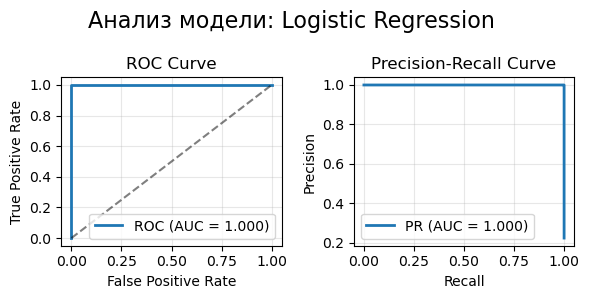

In [ ]:
pred_class = logRegressClf.predict(X_test_scl)
pred_proba = logRegressClf.predict_proba(X_test_scl)
results_extra_info = evaluate_credit_model(y_test, pred_class, pred_proba, "Logistic Regression ")

Модель показала идеальные результаты. Это произошло потому, что наш датасет содержал данные о том какие данные были восстановлены. А для невыплаченных кредитов несколько признаков отсутсвовали полностью. 

In [11]:
def value_of_features_in_regres(model, data, top=None):
    coeff =model.coef_.tolist()
    column_names = data.columns.tolist()
    name2coeff = {}
    for i in range(len(coeff[0])):
        name2coeff[column_names[i]] = coeff[0][i]
    if top:
        sorted_by_importance = dict(sorted(name2coeff.items(), key=lambda x: x[1], reverse=True)[:top])
        for feature, value in sorted_by_importance.items():
            print(feature, ':', value)
    else:
        sorted_by_importance = dict(sorted(name2coeff.items(), key=lambda x: x[1], reverse=True))
        for feature, value in sorted_by_importance.items():
            print(feature, ':', value)

In [12]:
value_of_features_in_regres(logRegressClf, X)

rate_of_interest_missing : 7.163153031219871
credit_type_EQUI : 1.1833686613246674
property_value_missing : 1.0604459339217196
LTV_missing : 1.0604459339217196
dtir1_missing : 0.5856317668630963
submission_of_application_to_inst : 0.08218696671462376
co-applicant_credit_type_EXP : 0.05224974428135576
Secured_by_land : 0.04864855778336088
age_55-64 : 0.033026233312967626
Credit_Worthiness_l2 : 0.031780249333904026
loan_limit_ncf : 0.028940765442166103
loan_purpose_p2 : 0.02770487401611986
Region_central : 0.026423090501526098
dtir1 : 0.02583255695624504
age_45-54 : 0.024863961868373297
loan_type_type2 : 0.024420326955054715
age_>74 : 0.01752278783612
Credit_Score : 0.015008834990459595
Region_south : 0.010104885074786636
property_value : 0.008688493525837844
Region_North-East : 0.008636097102986236
loan_purpose_p3 : 0.007134349507989524
LTV : 0.006273507024557631
age_<25 : 0.005309652787398884
Gender_Male : 0.004563609179288877
age_35-44 : 0.0005858491047321659
term_short : -0.002060934

Можно заметить что самые большие веса у признаки говорящие о пропуске данных. Уберем эти данные и посмотрим на поведение модели. В дальнейшем будем использовать датасет без привелигированной информации.

### Data without extra information about missing data

In [16]:
data = pd.read_csv('Data\clean_data_no_extra_info.csv')

In [17]:
X, Y = data.drop(['Status'], axis=1), data['Status']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = split_data_stratified(X, Y, )

Распределение классов:
Train:      [76917 22171]
Test:       [19230  5543]


In [18]:
std_scaler = StandardScaler().fit(X_train)
X_train_scl = std_scaler.transform(X_train)
X_test_scl = std_scaler.transform(X_test)

In [19]:
logRegressClfNoExtraInfo = LogisticRegression()

In [20]:
logRegressClfNoExtraInfo.fit(X_train_scl, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


📊 КОМПЛЕКСНАЯ ОЦЕНКА МОДЕЛИ: Logistic Regression 

🎯 КРЕДИТНЫЕ МЕТРИКИ:
------------------------------
(24773,) (24773,)
ROC-AUC:      0.8225
Gini:         0.6450
AUC-PR:       0.7293

📈 КЛАССИЧЕСКИЕ МЕТРИКИ:
------------------------------
Precision (Default): 0.9447
Recall (Default):    0.4588
F1 (Default):       0.6176

📊 ВИЗУАЛИЗАЦИИ:
------------------------------


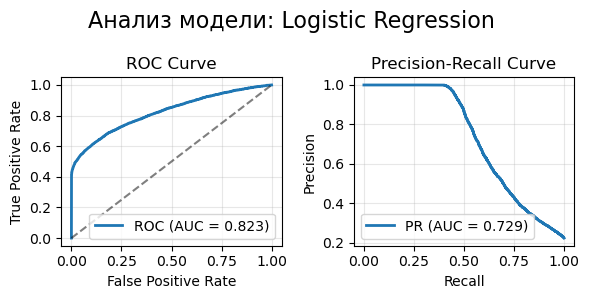

In [22]:
pred_class = logRegressClfNoExtraInfo.predict(X_test_scl)
pred_proba = logRegressClfNoExtraInfo.predict_proba(X_test_scl)
results_base1 = evaluate_credit_model(y_test, pred_class, pred_proba, "Logistic Regression ")

Модель показала хорошие результаты. В данной задаче для нас важнее показатель recall, потому что мы несём очень большие убытки, если заёмщик не вернёт кредит. В зависимости от требований бизнеса Recall можно улучшить за счёт изменения порога (trashhold).

Результаты данной модели будем рассматривать как baseline

In [23]:
joblib.dump(logRegressClfNoExtraInfo, 'models/logistic_regression_model.joblib')

['models/logistic_regression_model.joblib']

In [24]:
table_of_results = pd.DataFrame.from_dict({'baseline':results_base1}, orient='index')

Рассмотрим важность признаков

In [25]:
value_of_features_in_regres(logRegressClfNoExtraInfo, X)

credit_type_EQUI : 3.0004004962781656
LTV : 0.6349114071094388
property_value : 0.5056854179119881
submission_of_application_to_inst : 0.32336021512579205
loan_purpose_p3 : 0.17454769776916995
age_55-64 : 0.15400368629335115
dtir1 : 0.15112166650802125
loan_purpose_p2 : 0.1426401670431262
Secured_by_land : 0.1399410384141838
loan_purpose_p4 : 0.13517705289351925
age_45-54 : 0.12859230790189552
age_65-74 : 0.1141035664381624
Region_south : 0.10469483514687151
loan_limit_ncf : 0.09821393593381812
age_>74 : 0.0909189046416923
Credit_Worthiness_l2 : 0.08284574380287307
Region_central : 0.06329521261809905
Gender_Male : 0.05787592328108158
age_35-44 : 0.04421698104806584
loan_type_type2 : 0.03069607795323362
Region_North-East : 0.027129740210576403
credit_type_CRIF : 0.02193632920643106
age_<25 : 0.020538969225217103
Credit_Score : 0.01342415256252053
Gender_Sex Not Available : 0.00459741247095174
Gender_Joint : 0.0032923810997369423
credit_type_EXP : -0.007120577578555902
term_short : -0.0

Рассмотрим абсолютную важность признаков.

In [26]:
def show_absolute_value_of_features_in_regres(model, data, top=None):
    coeff =model.coef_.tolist()
    column_names = data.columns.tolist()
    for i, v in enumerate(coeff[0]):
        coeff[0][i] = abs(v)
        
    name2coeff = {}
    for i in range(len(coeff[0])):
        name2coeff[column_names[i]] = coeff[0][i]
    if top:
        sorted_by_importance = dict(sorted(name2coeff.items(), key=lambda x: x[1], reverse=True)[:top])
        for feature, value in sorted_by_importance.items():
            print(feature, ':', value)
    else:
        sorted_by_importance = dict(sorted(name2coeff.items(), key=lambda x: x[1], reverse=True))
        for feature, value in sorted_by_importance.items():
            print(feature, ':', value)

In [27]:
show_absolute_value_of_features_in_regres(logRegressClfNoExtraInfo, X)

credit_type_EQUI : 3.0004004962781656
LTV : 0.6349114071094388
property_value : 0.5056854179119881
loan_amount : 0.39567718857387535
lump_sum_payment_not_lpsm : 0.37900739998932853
submission_of_application_to_inst : 0.32336021512579205
Neg_ammortization_not_neg : 0.2954421702495085
income : 0.22958715962611514
loan_type_type3 : 0.18605326172778144
loan_purpose_p3 : 0.17454769776916995
age_55-64 : 0.15400368629335115
dtir1 : 0.15112166650802125
loan_purpose_p2 : 0.1426401670431262
Secured_by_land : 0.1399410384141838
loan_purpose_p4 : 0.13517705289351925
age_45-54 : 0.12859230790189552
age_65-74 : 0.1141035664381624
co-applicant_credit_type_EXP : 0.10713421502196825
Region_south : 0.10469483514687151
loan_limit_ncf : 0.09821393593381812
age_>74 : 0.0909189046416923
approv_in_adv_pre : 0.08534637958951229
Credit_Worthiness_l2 : 0.08284574380287307
interest_only_not_int : 0.06339677755099372
Region_central : 0.06329521261809905
rate_of_interest : 0.060676058303318625
Gender_Male : 0.0578

## 3.2 logistic regression

Можно уменьшить количество параметров модели. Будем действовать следующим образом :
 - Из предварительного анализа мы знаем, что loan_amount и property_value имеют сильную зависимость. И параметры модели это подтверждают (они почти одинаковые, но с разными знаками). Уберём property value из датасета, потому что некоторые значения были восстановленны.
 - Признак пол мало влияет на предсказания. Так же его уберём.
 - Также место расположения недвижимости слабо влияет на предсказание
 
 Для того чтобы избежать утечки данных, разделим выборку на train, validation, test. 

In [69]:
data = pd.read_csv('Data\clean_data_no_extra_info.csv')
data = data.drop(['Gender', 'property_value', 'Region'], axis=1)
X, Y = data.drop(['Status'], axis=1), data['Status']
X = pd.get_dummies(X, drop_first=True)

In [28]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data_stratified(X, Y, need_validate=True)

Распределение классов:
Train:      [57688 16628]
Validation: [19229  5543]
Test:       [19230  5543]


In [29]:
std_scaler = StandardScaler().fit(X_train)
X_train_scl = std_scaler.transform(X_train)
X_val_scl = std_scaler.transform(X_val)
X_test_scl = std_scaler.transform(X_test)

In [30]:
logRegressClf_Tuned = LogisticRegression()

In [31]:
logRegressClf_Tuned.fit(X_train_scl, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


📊 КОМПЛЕКСНАЯ ОЦЕНКА МОДЕЛИ: Logistic Regression 

🎯 КРЕДИТНЫЕ МЕТРИКИ:
------------------------------
ROC-AUC:      0.8191
Gini:         0.6381
AUC-PR:       0.7258

📈 КЛАССИЧЕСКИЕ МЕТРИКИ:
------------------------------
Precision (Default): 0.9506
Recall (Default):    0.4550
F1 (Default):       0.6154

📊 ВИЗУАЛИЗАЦИИ:
------------------------------


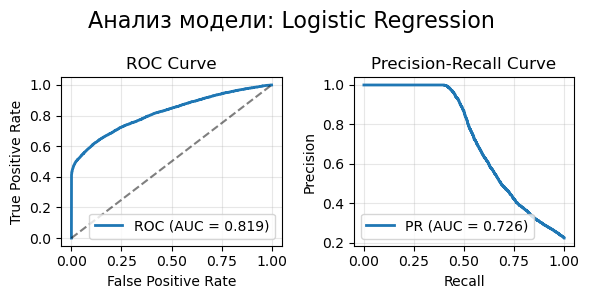

In [ ]:
pred_class = logRegressClf_Tuned.predict(X_val_scl)
pred_proba = logRegressClf_Tuned .predict_proba(X_val_scl)
results = evaluate_credit_model(y_test, pred_class, pred_proba, "Logistic Regression ")

Качество модели почти не изменилось.

Возможные пути улучшения:
 - Модель не знает о дисбалансе классов. Добавим штраф за ошибку на минаритарном классе.
 - С помощью GridSearh подберём лучший тип и значения для регуляризации 

In [92]:
logRegressClf_Tuned = LogisticRegression(class_weight='balanced')

📊 КОМПЛЕКСНАЯ ОЦЕНКА МОДЕЛИ: Logistic Regression 

🎯 КРЕДИТНЫЕ МЕТРИКИ:
------------------------------
ROC-AUC:      0.8237
Gini:         0.6475
AUC-PR:       0.7278

📈 КЛАССИЧЕСКИЕ МЕТРИКИ:
------------------------------
Precision (Default): 0.5904
Recall (Default):    0.6296
F1 (Default):       0.6094

📊 ВИЗУАЛИЗАЦИИ:
------------------------------


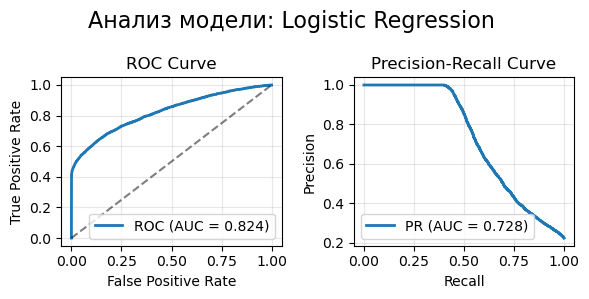

In [93]:
logRegressClf_Tuned.fit(X_train_scl, y_train)
pred_class = logRegressClf_Tuned.predict(X_test_scl)
pred_proba = logRegressClf_Tuned .predict_proba(X_test_scl)
results_balanced = evaluate_credit_model(y_test, pred_class, pred_proba, "Logistic Regression ")

После учета дисбаланса классов метрики ROC_AUC, AUC_PR, GINI не поменялись. Но Recall вырос на 15% процентов, а Pressicion упал на 35%, при этом F1 мера изменилась лишь на 1%. Для текущей задачи эта модель лучше, потому что чаще находит неплательщиков. 

### GridSearch

In [19]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [25]:
data = pd.read_csv('Data\clean_data_no_extra_info.csv')
data = data.drop(['Gender', 'property_value', 'Region'], axis=1)
X, Y = data.drop(['Status'], axis=1), data['Status']
X = pd.get_dummies(X, drop_first=True)
X_train, X_val, X_test, y_train, y_val, y_test = split_data_stratified(X, Y, need_validate=True)
std_scaler = StandardScaler().fit(X_train)
X_train_scl = std_scaler.transform(X_train)
X_val_scl = std_scaler.transform(X_val)
X_test_scl = std_scaler.transform(X_test)

Распределение классов:
Train:      [57688 16628]
Validation: [19229  5543]
Test:       [19230  5543]


In [29]:
# Определяем параметры для поиска
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # сила регуляризации
    'penalty': ['l1', 'l2'],  # тип регуляризации
    'solver': ['liblinear', 'saga'],  # решатели, поддерживающие L1
    'max_iter': [100, 1000]
}

scoring = {
    'f1': make_scorer(f1_score, average='binary'),
    'roc_auc': make_scorer(roc_auc_score),
    'recall': make_scorer(recall_score)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [32]:
# Запускаем GridSearch
grid_search = GridSearchCV(
    LogisticRegression(random_state=42, class_weight='balanced'),
    param_grid,
    cv=cv,  # используем исправленную кросс-валидацию
    scoring=scoring,
    refit='recall',  # оптимизируем по F1
    n_jobs=-1,  # используем все ядра
    verbose=1
)

In [33]:
# Обучаем
grid_search.fit(X_train_scl, y_train)

# Лучшая модель
best_model = grid_search.best_estimator_
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший F1 score: {grid_search.best_score_:.4}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Лучшие параметры: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Лучший F1 score: 0.6169


📊 КОМПЛЕКСНАЯ ОЦЕНКА МОДЕЛИ: Logistic Regression 

🎯 КРЕДИТНЫЕ МЕТРИКИ:
------------------------------
ROC-AUC:      0.8179
Gini:         0.6357
AUC-PR:       0.7164

📈 КЛАССИЧЕСКИЕ МЕТРИКИ:
------------------------------
Precision (Default): 0.6042
Recall (Default):    0.6116
F1 (Default):       0.6079

📊 ВИЗУАЛИЗАЦИИ:
------------------------------


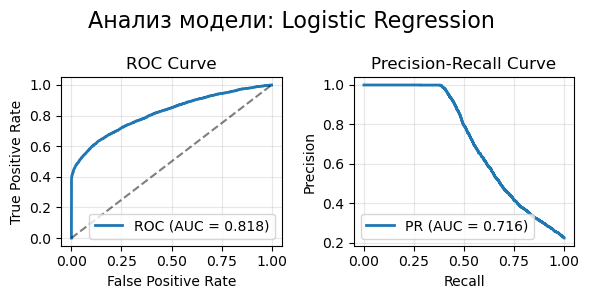

In [36]:
pred_class = best_model.predict(X_val_scl)
pred_proba = best_model.predict_proba(X_val_scl)
results = evaluate_credit_model(y_val, pred_class, pred_proba, "Logistic Regression ")

Существенного прироста результата не произошло. Попробуем подобрать еще более точный коээфициент регуляризации.

In [40]:
param_grid = {
    'C': [5, 7, 10, 13, 15, 17, 20],  # сила регуляризации
}
# Запускаем GridSearch
grid_search = GridSearchCV(
    LogisticRegression(random_state=42, class_weight='balanced', solver='saga'),
    param_grid,
    cv=cv,  # используем исправленную кросс-валидацию
    scoring=scoring,
    refit='recall',  # оптимизируем по F1
    n_jobs=-1,  # используем все ядра
    verbose=1
)

In [41]:
# Обучаем
grid_search.fit(X_train_scl, y_train)

# Лучшая модель
best_model = grid_search.best_estimator_
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший F1 score: {grid_search.best_score_:.4}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Лучшие параметры: {'C': 7}
Лучший F1 score: 0.6169


Попробуем обучить эту лучше модель нетолько на train, но и на validate выборке и сравним результаты

In [64]:
temp_train_X = np.vstack((X_train_scl, X_val_scl))
tem_train_y =   np.hstack((y_train, y_val))

In [65]:
best_model.fit(temp_train_X, tem_train_y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,7
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'saga'
,max_iter,100
,multi_class,'deprecated'


📊 КОМПЛЕКСНАЯ ОЦЕНКА МОДЕЛИ: Logistic Regression 

🎯 КРЕДИТНЫЕ МЕТРИКИ:
------------------------------
ROC-AUC:      0.8202
Gini:         0.6404
AUC-PR:       0.7244

📈 КЛАССИЧЕСКИЕ МЕТРИКИ:
------------------------------
Precision (Default): 0.5942
Recall (Default):    0.6229
F1 (Default):       0.6082

📊 ВИЗУАЛИЗАЦИИ:
------------------------------


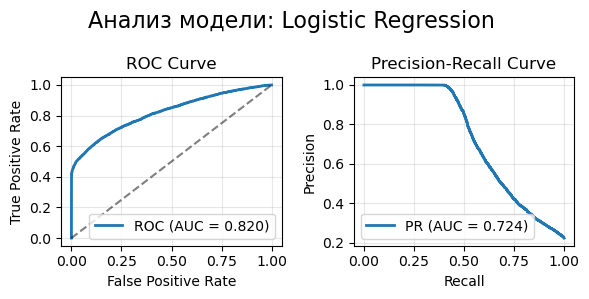

In [67]:
pred_class = best_model.predict(X_test_scl)
pred_proba = best_model.predict_proba(X_test_scl)
results = evaluate_credit_model(y_test, pred_class, pred_proba, "Logistic Regression ")

Сохраним результаты лучшей модели в сводную таблицу

In [94]:
table_of_results.loc['tuned_logistic_regression'] = results_balanced

In [95]:
table_of_results

,ROC-AUC,Gini,AUC-PR,Precision (Default),Recall (Default),F1 (Default)
baseline,0.822501,0.645002,0.729273,0.944651,0.458777,0.617608
tuned_logistic_regression,0.823747,0.647493,0.727846,0.590425,0.629623,0.609394


## 3.3 Decision Tree

Данная модель хорошо подходит потому что:
- Она хорошо интепритируема (объяснима для бизнесса)
- Позволяет провести отбор важных признаков
- Нетребовательна к предобработке признаков
- достаточно быстрая 

#### baseModel

In [107]:
data = pd.read_csv('Data\clean_data_no_extra_info.csv')
X, Y = data.drop(['Status'], axis=1), data['Status']

К сожалению skitlearn реализация работает только с числовыми значениями. Поэтому применем label_encoding

In [111]:
from sklearn.preprocessing import LabelEncoder
def prepare_features_for_tree(X):
  
    X_prepared = X.copy()
    encoders = {}
    
    # Обрабатываем каждую колонку
    for col in X_prepared.columns:
        if X_prepared[col].dtype == 'object':
            # Label Encoding для строковых колонок
            le = LabelEncoder()
            X_prepared[col] = le.fit_transform(X_prepared[col].astype(str))
            encoders[col] = le
            print(f"Закодирована колонка '{col}': {len(le.classes_)} категорий")
    
    return X_prepared, encoders

# Использование
X_encoded, feature_encoders = prepare_features_for_tree(X)

Закодирована колонка 'loan_limit': 2 категорий
Закодирована колонка 'Gender': 4 категорий
Закодирована колонка 'approv_in_adv': 2 категорий
Закодирована колонка 'loan_type': 3 категорий
Закодирована колонка 'loan_purpose': 4 категорий
Закодирована колонка 'Credit_Worthiness': 2 категорий
Закодирована колонка 'open_credit': 2 категорий
Закодирована колонка 'business_or_commercial': 2 категорий
Закодирована колонка 'term': 4 категорий
Закодирована колонка 'Neg_ammortization': 2 категорий
Закодирована колонка 'interest_only': 2 категорий
Закодирована колонка 'lump_sum_payment': 2 категорий
Закодирована колонка 'Secured_by': 2 категорий
Закодирована колонка 'credit_type': 4 категорий
Закодирована колонка 'co-applicant_credit_type': 2 категорий
Закодирована колонка 'age': 7 категорий
Закодирована колонка 'submission_of_application': 2 категорий
Закодирована колонка 'Region': 4 категорий


Для данного алгоритма точно понадобиться валидационная выборка, потому что деревья очень сильно переобучаются и нужно подбирать параметры.

In [112]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data_stratified(X_encoded, Y, need_validate=True)

Распределение классов:
Train:      [57688 16628]
Validation: [19229  5543]
Test:       [19230  5543]


In [113]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


📊 КОМПЛЕКСНАЯ ОЦЕНКА МОДЕЛИ: Decision tree

🎯 КРЕДИТНЫЕ МЕТРИКИ:
------------------------------
ROC-AUC:      0.8237
Gini:         0.6475
AUC-PR:       0.7278

📈 КЛАССИЧЕСКИЕ МЕТРИКИ:
------------------------------
Precision (Default): 0.5904
Recall (Default):    0.6296
F1 (Default):       0.6094

📊 ВИЗУАЛИЗАЦИИ:
------------------------------


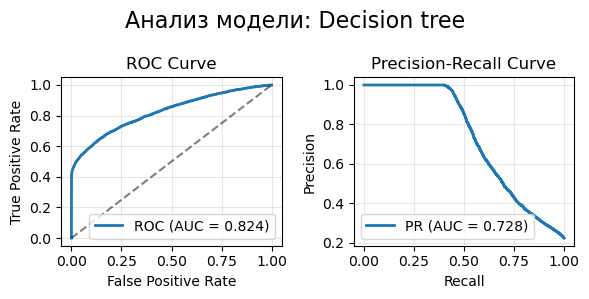

In [116]:
# Предсказания
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]

# Оценка модели
results_simple_tree = evaluate_credit_model(y_test, pred_class, pred_proba, "Decision tree")

Модель уже показывает приемлимые резульаты. Давайте посмотрим на структуру дерева и на важность признаков.

In [115]:
table_of_results.loc['simple_desicion_tree'] = results_simple_tree
table_of_results

,ROC-AUC,Gini,AUC-PR,Precision (Default),Recall (Default),F1 (Default)
baseline,0.822501,0.645002,0.729273,0.944651,0.458777,0.617608
tuned_logistic_regression,0.823747,0.647493,0.727846,0.590425,0.629623,0.609394
simple_desicion_tree,0.823747,0.647493,0.727846,0.590425,0.629623,0.609394


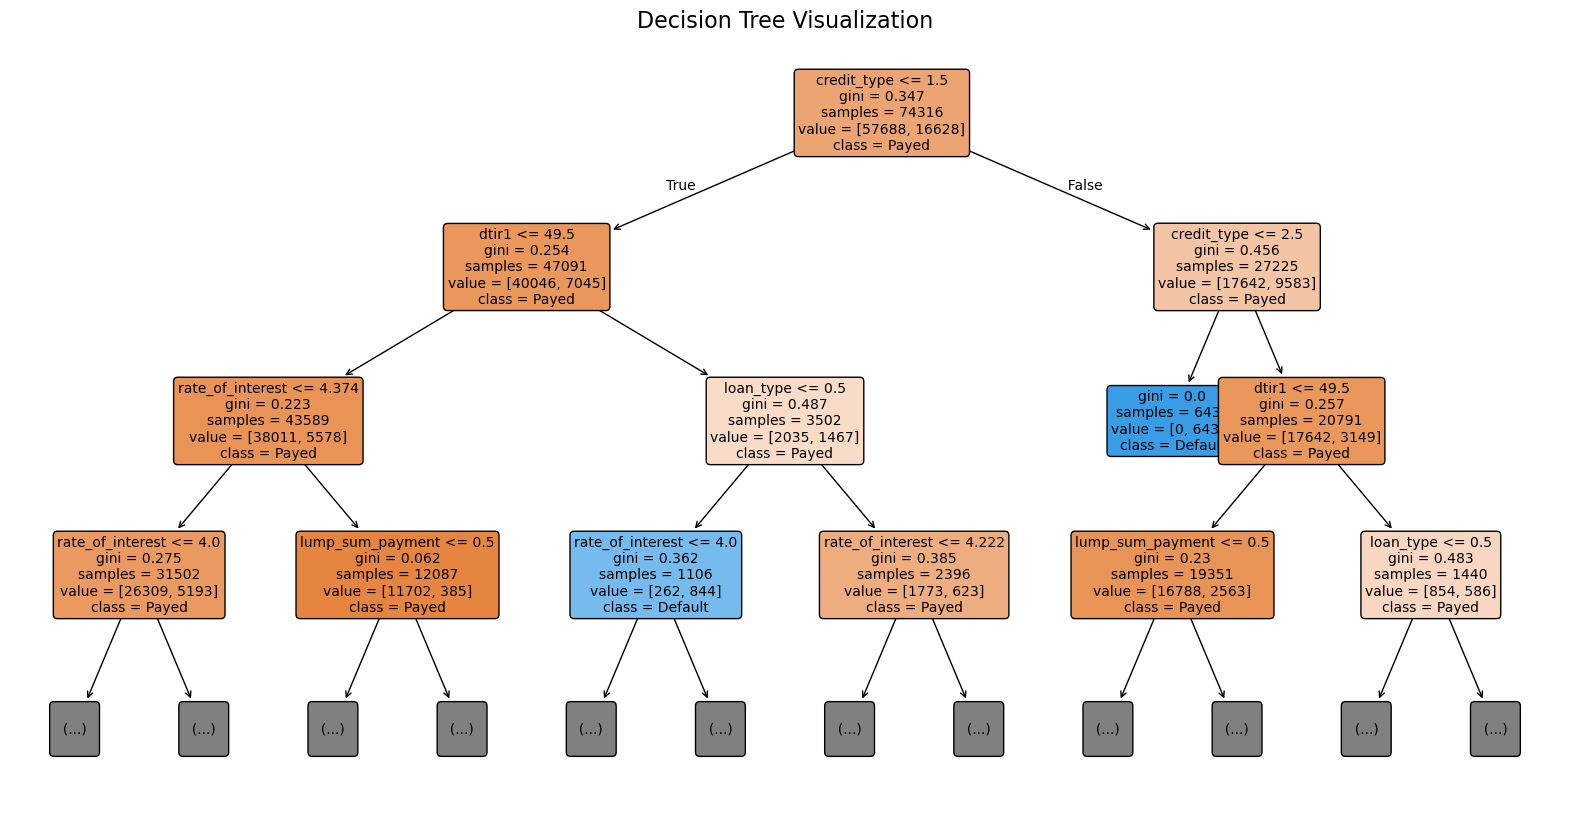

Правила дерева (первые 2 уровня):
|--- credit_type <= 1.50
|   |--- dtir1 <= 49.50
|   |   |--- rate_of_interest <= 4.37
|   |   |   |--- truncated branch of depth 16
|   |   |--- rate_of_interest >  4.37
|   |   |   |--- truncated branch of depth 14
|   |--- dtir1 >  49.50
|   |   |--- loan_type <= 0.50
|   |   |   |--- truncated branch of depth 11
|   |   |--- loan_type >  0.50
|   |   |   |--- truncated branch of depth 11
|--- credit_type >  1.50
|   |--- credit_type <= 2.50
|   |   |--- class: 1
|   |--- credit_type >  2.50
|   |   |--- dtir1 <= 49.50
|   |   |   |--- truncated branch of depth 18
|   |   |--- dtir1 >  49.50
|   |   |   |--- truncated branch of depth 16



In [118]:
def visualize_decision_tree(model, feature_names, class_names, max_depth=3):
    """
    Визуализация Decision Tree
    """
    plt.figure(figsize=(20, 10))
    
    plot_tree(
        model,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        max_depth=max_depth,  # Ограничиваем глубину для читаемости
        fontsize=10
    )
    
    plt.title("Decision Tree Visualization", fontsize=16)
    plt.show()
    
    # Текстовая версия (первые несколько уровней)
    tree_rules = export_text(
        model, 
        feature_names=feature_names,
        max_depth=2  # Только первые 2 уровня
    )
    print("Правила дерева (первые 2 уровня):")
    print(tree_rules)

# Использование
feature_names = X_encoded.columns.tolist()
class_names = ['Payed', 'Default']  # Замените на ваши названия классов

visualize_decision_tree(dt_model, feature_names, class_names, max_depth=3)

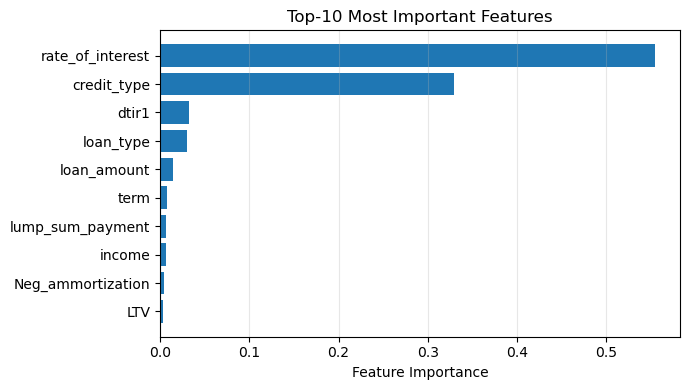

Важность признаков:
          feature  importance
 rate_of_interest    0.554699
      credit_type    0.328886
            dtir1    0.032568
        loan_type    0.029726
      loan_amount    0.014651
             term    0.007725
 lump_sum_payment    0.006903
           income    0.006572
Neg_ammortization    0.003974
              LTV    0.003447


In [124]:
def analyze_feature_importance(model, feature_names, top_n=15):
    """
    Анализ важности признаков
    """
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Визуализация
    plt.figure(figsize=(7, 4))
    plt.barh(importance_df['feature'].head(top_n), 
             importance_df['importance'].head(top_n))
    plt.xlabel('Feature Importance')
    plt.title(f'Top-{top_n} Most Important Features')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("Важность признаков:")
    print(importance_df.head(top_n).to_string(index=False))
    
    return importance_df

# Анализ важности признаков
feature_importance = analyze_feature_importance(dt_model, feature_names, top_n=10)

Оказалось, что самые важные фичи для алгоритма - ставка кредита, тип кредита и долговая нагрузка заёмщика

#### Grid search and pruning

In [126]:
def dt_grid_search_basic(X, y):
    """
    Базовый GridSearch для Decision Tree
    """
    # Параметры для поиска
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [3, 5, 7, 10, 15, 20, None],
        'min_samples_split': [5, 10, 20],
        'min_samples_leaf': [5, 10, 20],
        'max_features': ['sqrt', 'log2', None],
        'class_weight': [None, 'balanced']
    }
    
    # Метрики
    scoring = {
        'f1': make_scorer(f1_score),
        'roc_auc': make_scorer(roc_auc_score),
        'recall': make_scorer(recall_score)
    }
    
    # Кросс-валидация
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # GridSearch
    grid_search = GridSearchCV(
        DecisionTreeClassifier(random_state=42),
        param_grid,
        cv=cv,
        scoring=scoring,
        refit='recall',  # Оптимизируем по F1
        n_jobs=-1,
        verbose=1,
        return_train_score=True
    )
    
    # Запуск поиска
    grid_search.fit(X, y)
    
    return grid_search

# Использование
grid_result = dt_grid_search_basic(X_train, y_train)

Fitting 5 folds for each of 756 candidates, totalling 3780 fits


In [127]:
best_dt = grid_result.best_estimator_

In [130]:
best_dt

,criterion,'entropy'
,splitter,'best'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [141]:
y_pred_proba.shape

(74316,)

In [139]:
y_train.shape

(74316,)

📊 КОМПЛЕКСНАЯ ОЦЕНКА МОДЕЛИ: Decision tree

🎯 КРЕДИТНЫЕ МЕТРИКИ:
------------------------------
(24773,) (24773,)
ROC-AUC:      0.9987
Gini:         0.9974
AUC-PR:       0.9967

📈 КЛАССИЧЕСКИЕ МЕТРИКИ:
------------------------------
Precision (Default): 0.9731
Recall (Default):    0.9973
F1 (Default):       0.9850

📊 ВИЗУАЛИЗАЦИИ:
------------------------------


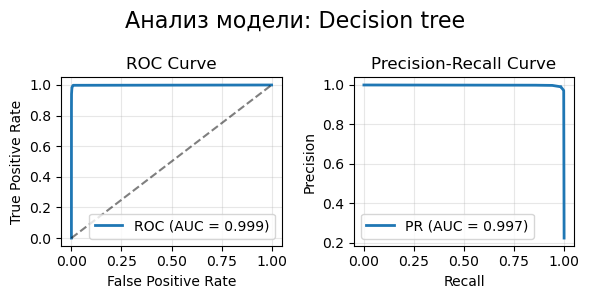

In [148]:
# Предсказания
y_pred_tree = best_dt.predict(X_test)
y_pred_proba_tree = best_dt.predict_proba(X_test)[:, 1]

# Оценка модели
results_GS_tree = evaluate_credit_model(y_test, y_pred_tree, y_pred_proba_tree, "Decision tree")

In [132]:
table_of_results.loc['GS_decision_tree'] = results_GS_tree
table_of_results

,ROC-AUC,Gini,AUC-PR,Precision (Default),Recall (Default),F1 (Default)
baseline,0.822501,0.645002,0.729273,0.944651,0.458777,0.617608
tuned_logistic_regression,0.823747,0.647493,0.727846,0.590425,0.629623,0.609394
simple_desicion_tree,0.823747,0.647493,0.727846,0.590425,0.629623,0.609394
GS_decision_tree,0.823747,0.647493,0.727846,0.590425,0.629623,0.609394
